## 2.2 Data acquisition and Libraries used


### 2.2.1 Libraries used to solve the problem

In [1]:
import warnings
warnings.filterwarnings('ignore') 
#import requests # HTTP library
import requests
import pandas as pd # for data analysis
import numpy as np  # data in a vectorized manner manipulation
# Matplotlib and associated plotting modules for visualization
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

import statsmodels.api as sm # implement statistic tests
import time # use time
from geopy.geocoders import Nominatim  # for geocoders referencing
import geopandas as gpd # for spatial dataset
import seaborn as sns # for plotting and visulalization
from scipy import stats # statistic computation
from bs4 import BeautifulSoup # scrapping web site
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re # regular expression
import folium
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from  sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
# import k-means from clustering stage
from sklearn.cluster import KMeans
sns.set_style("white")

## 2.2.2 Data acquisition look and feel

#### Toronto Housing  Info Dataset

In [2]:
house_data = pd.read_csv('./dataset/houses.csv')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 15236 non-null  int64  
 1   title                 15236 non-null  object 
 2   final_price           15236 non-null  int64  
 3   list_price            15236 non-null  int64  
 4   bedrooms              15236 non-null  object 
 5   bathrooms             15236 non-null  object 
 6   sqft                  15236 non-null  object 
 7   parking               15236 non-null  object 
 8   description           15187 non-null  object 
 9   mls                   15236 non-null  object 
 10  type                  15236 non-null  object 
 11  full_link             15236 non-null  object 
 12  full_address          15236 non-null  object 
 13  lat                   15236 non-null  float64
 14  long                  15236 non-null  float64
 15  city_district      

In [3]:
house_data.head(2)

index                                              title  final_price  \
0      0  1303 - 38 Grenville St, Toronto (C4461599) | Z...       855000   
1      1          2 Cabot Crt, Toronto (W4502992) | Zoocasa       885000   

   list_price    bedrooms bathrooms             sqft    parking  \
0      870000  2 + 1 beds   2 baths  800–899 sq. ft.  1 parking   
1      898000      3 beds   2 baths      N/A sq. ft.  6 parking   

                                         description       mls           type  \
0  Luxurious And Spacious Murano Tower. 2+1, 2 Ba...  C4461599      Condo Apt   
1  Fantastic Opportunity To Live Within The Histo...  W4502992  Semi-Detached   

                                           full_link  \
0  https://www.zoocasa.com/toronto-on-real-estate...   
1  https://www.zoocasa.com/toronto-on-real-estate...   

                                  full_address        lat       long  \
0   38 Grenville St, Toronto , Ontario, Canada  43.661896 -79.385748   
1       2 Cabot Crt, Toronto , Ontario, Canada  43.646982 -79.530356   

                city_district  mean_district_income  district_code  
0         Bay Street Corridor                 56526             76  
1  Islington-City Centre West                 52787             14

#### MCI Dataset 

In [32]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    167525 non-null  float64
 1   Y                    167525 non-null  float64
 2   Index_               167525 non-null  int64  
 3   event_unique_id      167525 non-null  object 
 4   occurrencedate       167525 non-null  object 
 5   reporteddate         167525 non-null  object 
 6   premisetype          167525 non-null  object 
 7   ucr_code             167525 non-null  int64  
 8   ucr_ext              167525 non-null  int64  
 9   offence              167525 non-null  object 
 10  reportedyear         167525 non-null  int64  
 11  reportedmonth        167525 non-null  object 
 12  reportedday          167525 non-null  int64  
 13  reporteddayofyear    167525 non-null  int64  
 14  reporteddayofweek    167525 non-null  object 
 15  reportedhour     

In [33]:
mci_2014_2018.head(2)

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   

              offence  reportedyear reportedmonth  reportedday  \
0          Theft Over          2014          June           20   
1  Pointing A Firearm          2014          July            2   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   

  occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0            June           20.0                171.0          Friday       
1            July            2.0                183.0          Wednesday    

   occurrencehour         MCI Division  Hood_ID             Neighbourhood  \
0              10  Theft Over      D52       76  Bay Street Corridor (76)   
1               0     Assault      D32       36     Newtonbrook West (36)   

         Lat       Long  ObjectId  
0  43.659229 -79.385193      2001  
1  43.777592 -79.425400      2002

#### Toronto Neighbourhoods Shapefile Dataset

In [34]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_6','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code','FIELD_6': 'city_district'},inplace =True)
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_goemetry_final = data_geom

In [35]:
data_geom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   district_code  140 non-null    int64   
 1   city_district  140 non-null    int64   
 2   x              140 non-null    float64 
 3   y              140 non-null    float64 
 4   geometry       140 non-null    geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 5.6 KB


In [36]:
data_geom.head(3)

district_code  city_district          x          y  \
0             94             94 -79.425515  43.676919   
1            100            100 -79.403590  43.704689   
2             97             97 -79.397871  43.687859   

                                            geometry  
0  POLYGON ((309967.120 4837586.769, 310047.783 4...  
1  POLYGON ((311976.621 4840247.041, 312084.257 4...  
2  POLYGON ((313572.832 4837693.591, 313555.868 4...

In [52]:
# @hidden_cell

CLIENT_ID = 'RVJDHM5QFQZ1FLRTQ2G0VHPUZES0YMPJVDBDBHHOTCPGTBN4' # your Foursquare ID
CLIENT_SECRET = '0ONU0KYNRFZG5HXX1FGZWAHD1K5YRYDAKNSAB2L1UWAM0QXQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [53]:
toronto_latitude = data_geom.loc[30, 'y'] # neighborhood latitude value
toronto_longitude = data_geom.loc[30, 'x'] # neighborhood longitude value

toronto_name = data_geom.loc[0, 'city_district'] # nteighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(toronto_name, 
                                                               toronto_latitude, 
                                                               toronto_longitude))

Latitude and longitude values of 94 are 43.6974081338, -79.2797083433.


In [54]:
# @hidden_cell
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 20000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude,
    toronto_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RVJDHM5QFQZ1FLRTQ2G0VHPUZES0YMPJVDBDBHHOTCPGTBN4&client_secret=0ONU0KYNRFZG5HXX1FGZWAHD1K5YRYDAKNSAB2L1UWAM0QXQ&v=20180605&ll=43.6974081338,-79.2797083433&radius=20000&limit=100'

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
results = requests.get(url).json()
results

ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?&client_id=RVJDHM5QFQZ1FLRTQ2G0VHPUZES0YMPJVDBDBHHOTCPGTBN4&client_secret=0ONU0KYNRFZG5HXX1FGZWAHD1K5YRYDAKNSAB2L1UWAM0QXQ&v=20180605&ll=43.6974081338,-79.2797083433&radius=20000&limit=100 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fcbb4376400>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [57]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [236]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [237]:
toronto_venues = getNearbyVenues(names=data_goemetry_final['district_code'],
                                   latitudes=data_goemetry_final['y'],
                                   longitudes=data_goemetry_final['x']
                                  )

94
100
97
27
31
114
38
105
103
56
84
19
132
29
12
130
17
135
73
115
2
99
104
18
50
36
82
68
74
54
121
107
58
80
45
23
67
46
10
72
4
111
86
98
131
89
28
139
85
70
40
116
16
118
61
63
3
55
81
79
43
77
136
1
35
113
91
119
51
37
7
137
64
60
129
128
20
95
42
34
76
52
49
39
112
127
122
24
69
108
41
57
30
71
109
96
133
75
120
33
123
92
66
59
47
126
93
26
83
62
9
138
5
32
11
13
44
102
101
25
65
140
53
88
87
134
48
8
21
22
106
125
14
90
110
124
78
6
15
117


In [238]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
1                                14                      14     14   
2                                 3                       3      3   
3                                16                      16     16   
4                                 3                       3      3   
5                                 5                       5      5   
6                                 4                       4      4   
7                                 1                       1      1   
8                                 4                       4      4   
9                                 3                       3      3   
10                                2                       2      2   
11                                6                       6      6   
12                                4                       4      4   
13                                4                       4      4   
14                               14                      14     14   
15                                2                       2      2   
16                                1                       1      1   
17                                6                       6      6   
18                                6                       6      6   
19                               14                      14     14   
20                                6                       6      6   
21                                1                       1      1   
22                                3                       3      3   
23                                6                       6      6   
24                                4                       4      4   
25                                5                       5      5   
26                                3                       3      3   
27                                9                       9      9   
29                                4                       4      4   
30                                2                       2      2   
31                               23                      23     23   
32                                8                       8      8   
33                                3                       3      3   
34                                4                       4      4   
35                                3                       3      3   
37                                2                       2      2   
38                                2                       2      2   
39                               26                      26     26   
41                                8                       8      8   
42                               24                      24     24   
43                                5                       5      5   
44                               15                      15     15   
45                                2                       2      2   
46                               16                      16     16   
47                               10                      10     10   
48                                2                       2      2   
49                                4                       4      4   
50                                2                       2      2   
51                                2                       2      2   
52                                3                       3      3   
53                                7                       7      7   
54                               14                      14     14   
55                               18                      18     18   
56                               18                      18     18   
57                                3                       3      3   
58                                4                       4      4   
59                      

In [239]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 277 uniques categories.


In [240]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
cols=list(toronto_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
toronto_onehot=toronto_onehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
toronto_onehot.rename(columns = {'Neighborhood': 'Neighbourhood'}, inplace = True)
toronto_onehot.head()

Neighbourhood  African Restaurant  Airport Service  American Restaurant  \
0             94                   0                0                    0   
1             94                   0                0                    0   
2             94                   0                0                    0   
3             94                   0                0                    0   
4            100                   0                0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0             0               0             0       0                       0   
1             0               0             0       0                       0   
2             0               0             0       0                       0   
3             0               0             0       0                       0   
4             0               0             0       0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            1                    0                 0                   0   
4            0                    0                 0                   0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                0            0                0          0           0   
1                0            0                0          0           0   
2                0            0                0          0           0   
3                0            0                0          0           0   
4                0            0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  Beach  \
0           0       0     0    0               0                 0      0   
1           0       0     0    0               0                 0      0   
2           0       0     0    0               0                 0      0   
3           0       0     0    0               0                 0      0   
4           0       0     0    0               0                 0      0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0         0           0                   0                         0   
1         0           0                   0                         0   
2         0           0                   0                         0   
3         0           0                   0                         0   
4         0           0                   0                         0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0          0       0              0          0         0              0   
1          0       0              0          0         0              0   
2          0       0              0          0         0              0   
3          0       0              0          0         0              0   
4          0       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0                0       0         0             0              0         0   
1                0       0         0             0              0         0   
2                0       0         0             0              0         0   
3                0       0         0             0              0        

In [241]:
toronto_onehot.shape

(2101, 277)

In [242]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  African Restaurant  Airport Service  American Restaurant  \
0                1                 0.0              0.0             0.000000   
1                2                 0.0              0.0             0.000000   
2                3                 0.0              0.0             0.000000   
3                4                 0.0              0.0             0.000000   
4                5                 0.4              0.0             0.000000   
5                6                 0.0              0.0             0.000000   
6                7                 0.0              0.0             0.000000   
7                8                 0.0              0.0             0.000000   
8                9                 0.0              0.0             0.000000   
9               10                 0.0              0.0             0.000000   
10              11                 0.0              0.0             0.000000   
11              12                 0.0              0.0             0.000000   
12              13                 0.0              0.0             0.000000   
13              14                 0.0              0.0             0.000000   
14              15                 0.0              0.0             0.000000   
15              16                 0.0              0.0             0.000000   
16              17                 0.0              0.0             0.000000   
17              18                 0.0              0.0             0.000000   
18              19                 0.0              0.0             0.000000   
19              20                 0.0              0.0             0.000000   
20              21                 0.0              0.0             0.000000   
21              22                 0.0              0.0             0.000000   
22              23                 0.0              0.0             0.000000   
23              24                 0.0              0.0             0.000000   
24              25                 0.0              0.0             0.000000   
25              26                 0.0              0.0             0.000000   
26              27                 0.0              0.0             0.000000   
27              29                 0.0              0.0             0.000000   
28              30                 0.0              0.0             0.000000   
29              31                 0.0              0.0             0.000000   
30              32                 0.0              0.0             0.000000   
31              33                 0.0              0.0             0.000000   
32              34                 0.0              0.0             0.000000   
33              35                 0.0              0.0             0.000000   
34              37                 0.0              0.0             0.000000   
35              38                 0.0              0.0             0.000000   
36              39                 0.0              0.0             0.038462   
37              41                 0.0              0.0             0.000000   
38              42                 0.0              0.0             0.000000   
39              43                 0.0              0.0             0.000000   
40              44                 0.0              0.0             0.000000   
41              45                 0.0              0.0             0.000000   
42              46                 0.0              0.0             0.000000   
43              47                 0.0              0.0             0.000000   
44              48                 0.0              0.0             0.000000   
45              49                 0.0              0.0             0.000000   
46              50                 0.0              0.0             0.000000   
47              51                 0.0              0.0             0.000000   
48              52                 0.0              0.0             0.000000   
49   

In [243]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [244]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighbourhood                     1st Most Common Venue  \
0                1                          Department Store   
1                2                       Japanese Restaurant   
2                3                         Indian Restaurant   
3                4                             Jewelry Store   
4                5                        African Restaurant   
5                6                               Coffee Shop   
6                7                                       Gym   
7                8                               Pizza Place   
8                9                                   Dog Run   
9               10                Construction & Landscaping   
10              11                              Hockey Arena   
11              12                                      Bank   
12              13                            Sandwich Place   
13              14                      Fast Food Restaurant   
14              15                                      Pool   
15              16                            Baseball Field   
16              17                                       Bar   
17              18                            Breakfast Spot   
18              19                               Coffee Shop   
19              20                               Pizza Place   
20              21                               Auto Garage   
21              22                              Hockey Field   
22              23                    Furniture / Home Store   
23              24                               Snack Place   
24              25                                      Park   
25              26                          Business Service   
26              27                            Massage Studio   
27              29                                     Trail   
28              30                Construction & Landscaping   
29              31                                Restaurant   
30              32                           Doctor's Office   
31              33                                      Park   
32              34                         Convenience Store   
33              35                                Baby Store   
34              37                         Mobile Phone Shop   
35              38                                      Park   
36              39                        Italian Restaurant   
37              41                                      Café   
38              42                            Clothing Store   
39              43                     Portuguese Restaurant   
40              44                       Japanese Restaurant   
41              45                         Food & Drink Shop   
42              46                    Thrift / Vintage Store   
43              47                                    Bakery   
44              48  Residential Building (Apartment / Condo)   
45              49                          Basketball Court   
46              50                               Bridal Shop   
47              51                                     Hotel   
48              52                                     Trail   
49              53                            Sandwich Place   
50              54                               Pizza Place   
51              55                         Indian Restaurant   
52              56                               Coffee Shop   
53              57                            Discount Store   
54              58                               Pastry Shop   
55              59                            Farmers Market   
56              60                                      Park   
57              61                            Baseball Field   
58              62                               Coffee Shop   
59              63                               Coffee Shop   
60              64                          Community Center   
61              65                   

In [246]:
neighborhoods_venues_sorted.reset_index().head(5)

index  Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0      0              1      Department Store                 Hotel   
1      1              2   Japanese Restaurant                  Park   
2      2              3     Indian Restaurant  Caribbean Restaurant   
3      3              4         Jewelry Store           Flower Shop   
4      4              5    African Restaurant      Business Service   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Mediterranean Restaurant  Gym / Fitness Center                  Bank   
1                 Coffee Shop           Zoo Exhibit   Empanada Restaurant   
2                 Pizza Place           Coffee Shop           Supermarket   
3                  Playground  Ethiopian Restaurant            Donut Shop   
4  Construction & Landscaping                  Pool     Health Food Store   

  6th Most Common Venue        7th Most Common Venue  \
0    Chinese Restaurant            Electronics Store   
1            Donut Shop          Dumpling Restaurant   
2       Thai Restaurant                          Spa   
3   Dumpling Restaurant  Eastern European Restaurant   
4                 Field               Farmers Market   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Paper / Office Supplies Store      Swiss Restaurant            Coffee Shop  
1    Eastern European Restaurant   Egyptian Restaurant      Electronics Store  
2                   Dance Studio      Asian Restaurant                   Bank  
3            Egyptian Restaurant     Electronics Store    Empanada Restaurant  
4                           Farm    Falafel Restaurant            Event Space

## 2.3 Data cleaning

In [37]:
house_data = pd.read_csv('./dataset/houses.csv')

In [38]:
# filter column sqft with value N/A sq. ft.
sqft_na_value = house_data[house_data.sqft == 'N/A sq. ft.']
sqft_na_value.shape
print('percent of missing data column sqft (% {})'.format(round((sqft_na_value.shape[0]/house_data.shape[0])*100,2)))

percent of missing data column sqft (% 29.68)


In [39]:
# sqft (% 29.68)  > 10 
house_data = house_data[house_data.sqft != 'N/A sq. ft.']
house_data.shape

(10714, 18)

In [40]:
# convert bedrooms string to numerical data
def conver_string_num(x):
    x = str(x)
    x = x.replace(' ','')
    result = 0
    tampon = x.split('+')
    if len(tampon) == 1:
        val = re.sub('\D','',tampon[0])
        if val !='':
            result = np.float(re.sub('\D','',tampon[0]))
    elif len(tampon) >1:
        digit_1 = float(tampon[0])
        digit_2 = np.float(re.sub('\D','',tampon[1]))
        result = digit_1+digit_2
    return result 
    

In [41]:
# change columns sqft text to categorical value 
my_dict = {'0-499 sq. ft.': 0,
               '1000–1199 sq. ft.':10,
               '1100–1299 sq. ft.':11,
               '1100–1500 sq. ft.':12,
               '1200–1399 sq. ft.':13,
               '1400–1599 sq. ft.':14,
               '1500–2000 sq. ft.':15,
               '1600–1799 sq. ft.':16,
               '1800–1999 sq. ft.':17,
               '2000–2249 sq. ft.':18,
               '2000–2500 sq. ft.':19,
               '2250–2499 sq. ft.':20,
               '2500–2749 sq. ft.':21,
               '2500–3000 sq. ft.':22,
               '2750–2999 sq. ft.':23,
               '3000–3249 sq. ft.':24,
               '3000–3500 sq. ft.':25,
               '3250–3499 sq. ft.':26,
               '3500–5000 sq. ft.':27,
               '4250–4499 sq. ft.':28,
               '500–599 sq. ft.': 1,
               '500–699 sq. ft.':2,
               '600–699 sq. ft.':3,
               '700–1100 sq. ft.':4,
               '700–799 sq. ft.':5,
               '700–899 sq. ft.':6,
               '800–899 sq. ft.':7,
               '900–1099 sq. ft.':8,
               '900–999 sq. ft.':9}
house_data['sqft_cat'] = house_data['sqft']
house_data.replace({'sqft_cat':my_dict},inplace =True)
house_data.head(2)

index                                              title  final_price  \
0      0  1303 - 38 Grenville St, Toronto (C4461599) | Z...       855000   
2      2  1504 - 30 Roehampton Ave, Toronto (C4511330) |...       550000   

   list_price    bedrooms bathrooms             sqft     parking  \
0      870000  2 + 1 beds   2 baths  800–899 sq. ft.   1 parking   
2      549900      1 beds   1 baths  500–599 sq. ft.  no parking   

                                         description       mls       type  \
0  Luxurious And Spacious Murano Tower. 2+1, 2 Ba...  C4461599  Condo Apt   
2  Bright Sunfilled Spacious 1 Bdr Unit; Floor To...  C4511330  Condo Apt   

                                           full_link  \
0  https://www.zoocasa.com/toronto-on-real-estate...   
2  https://www.zoocasa.com/toronto-on-real-estate...   

                                    full_address        lat       long  \
0     38 Grenville St, Toronto , Ontario, Canada  43.661896 -79.385748   
2   30 Roehampton Ave, Toronto , Ontario, Canada  43.708472 -79.397498   

         city_district  mean_district_income  district_code  sqft_cat  
0  Bay Street Corridor                 56526             76         7  
2  Mount Pleasant West                 57039            104         1

In [42]:
# extracts numerical infos from [bedrooms,bathrooms,parking]
house_data['bedrooms_num'] = house_data['bedrooms'].apply(lambda x:conver_string_num(x))
house_data['bathrooms_num'] = house_data['bathrooms'].apply(lambda x:conver_string_num(x))
house_data['parking_num'] = house_data['parking'].apply(lambda x:conver_string_num(x))

In [43]:
# converts final_price  and mean_district_income to 10k dollars
house_data['final_price_10k'] = house_data['final_price']/10000.0
house_data['mean_district_income_10k'] = np.round(house_data['mean_district_income']/10000.0,2)
house_data['final_price_log'] = np.round(np.log(house_data['final_price']),2)


In [44]:
## remove (-) in city_district columns
house_data.city_district =house_data.city_district.str.replace('-',' ')


In [45]:
# select feautres to improve data analysis 
selected_features =['lat','long','type','city_district','district_code','sqft','parking','bedrooms_num','bathrooms_num','final_price_10k','mean_district_income_10k','final_price_log']
house_final_data =house_data[selected_features]
house_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 15234
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lat                       10714 non-null  float64
 1   long                      10714 non-null  float64
 2   type                      10714 non-null  object 
 3   city_district             10714 non-null  object 
 4   district_code             10714 non-null  int64  
 5   sqft                      10714 non-null  object 
 6   parking                   10714 non-null  object 
 7   bedrooms_num              10714 non-null  float64
 8   bathrooms_num             10714 non-null  float64
 9   final_price_10k           10714 non-null  float64
 10  mean_district_income_10k  10714 non-null  float64
 11  final_price_log           10714 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.1+ MB


In [46]:
house_final_data.head(2)

lat       long       type        city_district  district_code  \
0  43.661896 -79.385748  Condo Apt  Bay Street Corridor             76   
2  43.708472 -79.397498  Condo Apt  Mount Pleasant West            104   

              sqft     parking  bedrooms_num  bathrooms_num  final_price_10k  \
0  800–899 sq. ft.   1 parking           3.0            2.0             85.5   
2  500–599 sq. ft.  no parking           1.0            1.0             55.0   

   mean_district_income_10k  final_price_log  
0                      5.65            13.66  
2                      5.70            13.22

### 2.2.2 mci_2014_2018 Data cleaning

In [47]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    167525 non-null  float64
 1   Y                    167525 non-null  float64
 2   Index_               167525 non-null  int64  
 3   event_unique_id      167525 non-null  object 
 4   occurrencedate       167525 non-null  object 
 5   reporteddate         167525 non-null  object 
 6   premisetype          167525 non-null  object 
 7   ucr_code             167525 non-null  int64  
 8   ucr_ext              167525 non-null  int64  
 9   offence              167525 non-null  object 
 10  reportedyear         167525 non-null  int64  
 11  reportedmonth        167525 non-null  object 
 12  reportedday          167525 non-null  int64  
 13  reporteddayofyear    167525 non-null  int64  
 14  reporteddayofweek    167525 non-null  object 
 15  reportedhour     

In [48]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
print(mci_2014_2018.shape)
mci_2014_2018['Neighbourhood'] = mci_2014_2018.Neighbourhood.apply(lambda x: x.split('(')[0].replace('-',' '))
mci_2014_2018.head()

(167525, 29)


X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   
2 -79.425400  43.777592    2351  GO-20142411379  2014-07-02T00:20:00.000Z   
3 -79.210373  43.801727    2352  GO-20142412127  2014-07-02T01:30:00.000Z   
4 -79.254334  43.835884    2354  GO-20142417548  2014-07-02T20:52:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   
2  2014-07-02T02:58:00.000Z     Outside      1610      100   
3  2014-07-02T05:40:00.000Z       House      2120      200   
4  2014-07-02T20:57:00.000Z  Commercial      1430      100   

               offence  reportedyear reportedmonth  reportedday  \
0           Theft Over          2014          June           20   
1   Pointing A Firearm          2014          July            2   
2  Robbery With Weapon          2014          July            2   
3                  B&E          2014          July            2   
4              Assault          2014          July            2   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   
2                183        Wednesday              2          2014.0   
3                183        Wednesday              5          2014.0   
4                183        Wednesday             20          2014.0   

  occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0            June           20.0                171.0          Friday       
1            July            2.0                183.0          Wednesday    
2            July            2.0                183.0          Wednesday    
3            July            2.0                183.0          Wednesday    
4            July            2.0                183.0          Wednesday    

   occurrencehour              MCI Division  Hood_ID         Neighbourhood  \
0              10       Theft Over      D52       76  Bay Street Corridor    
1               0          Assault      D32       36     Newtonbrook West    
2               0          Robbery      D32       36     Newtonbrook West    
3               1  Break and Enter      D42      132              Malvern    
4              20          Assault      D42      130             Milliken    

         Lat       Long  ObjectId  
0  43.659229 -79.385193      2001  
1  43.777592 -79.425400      2002  
2  43.777592 -79.425400      2003  
3  43.801727 -79.210373      2004  
4  43.835884 -79.254334      2005

In [49]:
val = {'January': 1,'February': 2,'March': 3,'April':4,'May':5,'June': 6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
mci_2014_2018.replace({"occurrencemonth": val},inplace=True)
# drop duplicate 
mci_2014_2018.drop_duplicates(keep=False,inplace=True) 
mci_2014_2018.head(10)
mci_2014_2018.rename(columns = {'Hood_ID':'district_code'},inplace = True)
selected_features = ['occurrenceyear','occurrencemonth','MCI','district_code','X','Y','offence']
mci_2014_2018 = mci_2014_2018[selected_features]

In [50]:
mci_2014_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167525 entries, 0 to 167524
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   occurrenceyear   167476 non-null  float64
 1   occurrencemonth  167476 non-null  float64
 2   MCI              167525 non-null  object 
 3   district_code    167525 non-null  int64  
 4   X                167525 non-null  float64
 5   Y                167525 non-null  float64
 6   offence          167525 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.2+ MB


In [51]:
mci_2014_2018.head(4)

occurrenceyear  occurrencemonth              MCI  district_code          X  \
0          2014.0              6.0       Theft Over             76 -79.385193   
1          2014.0              7.0          Assault             36 -79.425400   
2          2014.0              7.0          Robbery             36 -79.425400   
3          2014.0              7.0  Break and Enter            132 -79.210373   

           Y              offence  
0  43.659229           Theft Over  
1  43.777592   Pointing A Firearm  
2  43.777592  Robbery With Weapon  
3  43.801727                  B&E

In [245]:
neighborhoods_venues_sorted.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   137 non-null    int64 
 1   Neighbourhood           137 non-null    int64 
 2   1st Most Common Venue   137 non-null    object
 3   2nd Most Common Venue   137 non-null    object
 4   3rd Most Common Venue   137 non-null    object
 5   4th Most Common Venue   137 non-null    object
 6   5th Most Common Venue   137 non-null    object
 7   6th Most Common Venue   137 non-null    object
 8   7th Most Common Venue   137 non-null    object
 9   8th Most Common Venue   137 non-null    object
 10  9th Most Common Venue   137 non-null    object
 11  10th Most Common Venue  137 non-null    object
dtypes: int64(2), object(10)
memory usage: 13.0+ KB


In [247]:
house_data_final = house_data
mci_2014_2018_final = mci_2014_2018



# 3. Methodologie

## 3.1 Exploratory Data Analysis  for house_final_data dataset

In [248]:
# improve categorical values to numerics values function
def get_dummies(dataset,columns):
    for column_ in columns:
        data = pd.get_dummies(dataset[column_])
        for column in data.columns:
            dataset[column] = data[column]
    print(dataset.shape)
    return dataset

In [249]:
# function to compute group size of columns in dataset
def groupby_size(dataset,columns,name_of_size,ascending = False):
    data_group = dataset.groupby(columns).size().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={0:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values    


In [250]:
# function to compute group mean values of columns in dataset
def groupby_mean_value(dataset,columns,column_value,name_of_size,ascending = False):
    data_group = dataset.groupby(columns)[column_value].mean().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={column_value:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values

### 3.1.1 Choropleth of total houses by districts

In [251]:
house_by_neighborhood1 = groupby_size(dataset = house_data_final,columns =['district_code','city_district'],name_of_size = 'Total houses')

In [252]:
# merge house_final_data to data_geometry
data_geom2 = pd.merge(data_goemetry_final,house_by_neighborhood1, how ='inner',on ='district_code')

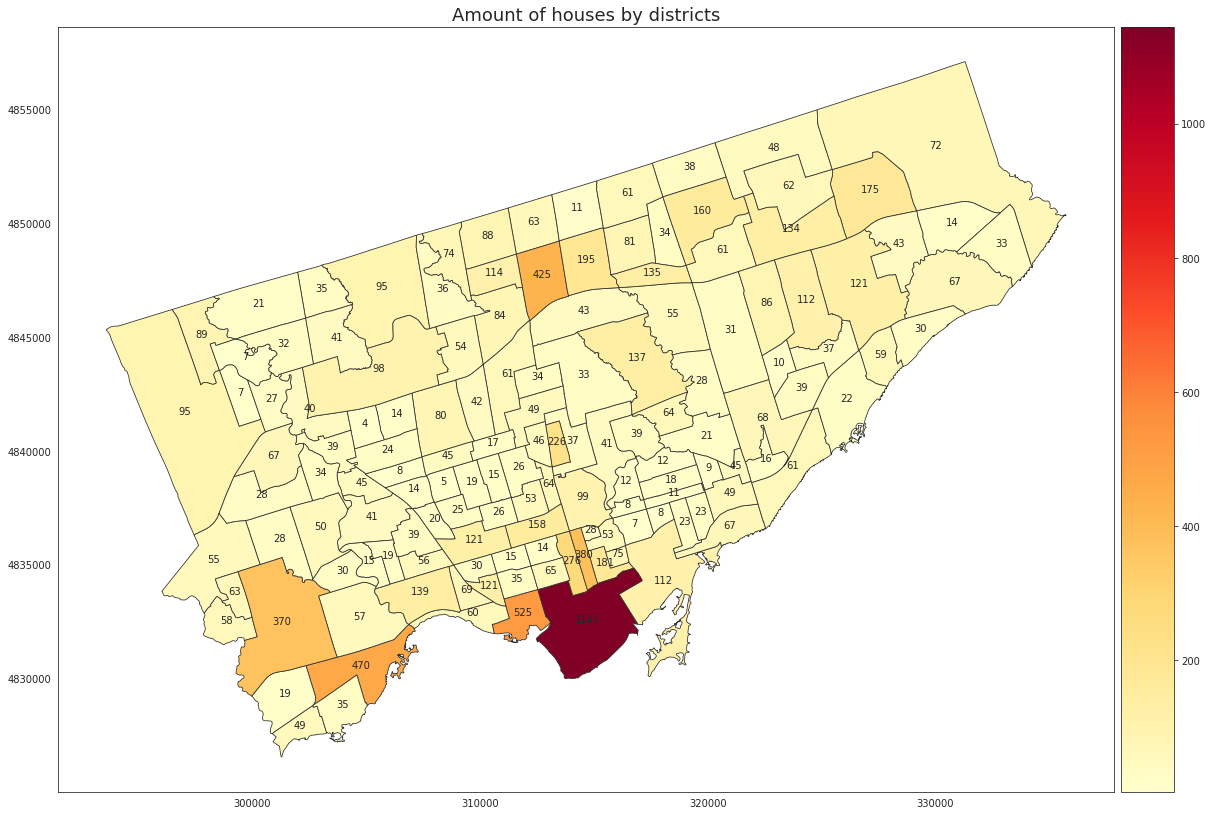

In [253]:
 # import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom2.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom2.plot(column='Total houses', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Amount of houses by districts',fontsize =18)
data_geom2.apply(lambda x: ax.annotate(s=x['Total houses'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


### 3.1.2 Top 25  of total house sales by district



In [254]:
house_by_neigh = house_by_neighborhood1.head(25)

In [255]:
def barh_group_size(dataset =pd.DataFrame(),sorted_column ='', x='',y= '', y_label =('',14),x_label = ('',14),ticks_font_size=12,title =('',16)):
    sorted_values = dataset.sort_values(by =[sorted_column],ascending = True)
    sorted_values[sorted_column] = np.round(sorted_values[sorted_column],2)
    ax =sorted_values.plot(kind='barh',x=x,y=y,figsize=(10,10))
    plt.ylabel(y_label[0], fontsize=y_label[1])
    plt.yticks(fontsize =ticks_font_size)
    plt.xticks(fontsize =ticks_font_size)
    plt.legend(fontsize =ticks_font_size)
    plt.xlabel(x_label[0], fontsize=x_label[1])
    plt.title(title[0],fontsize=title[1])
    rects = ax.patches
    for rect,label in zip(rects,sorted_values[sorted_column].values):
        ax.text(rect.get_width()+35,(rect.get_y()+rect.get_height()-0.25),label,ha ='center',va ='center',fontsize =ticks_font_size-2)

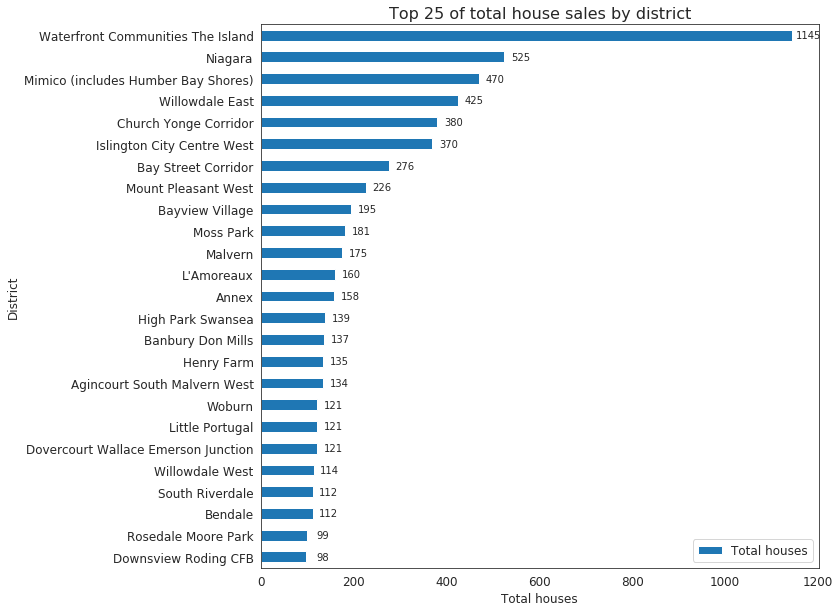

In [256]:
barh_group_size(house_by_neigh,sorted_column = 'Total houses',x='city_district',y='Total houses',y_label=('District',12),ticks_font_size=12,x_label=('Total houses',12),title =('Top 25 of total house sales by district',16))

### 3.1.3 Choropleth of average  house price  by district

In [257]:
house_by_neighborhood2 = groupby_mean_value(dataset = house_data_final,columns =['district_code','city_district'],column_value ='final_price_10k',name_of_size = 'Mean house price')
house_by_neighborhood2.head()

district_code             city_district  Mean house price
55              56        Leaside Bennington        222.150000
97              98       Rosedale Moore Park        197.106748
14              15            Kingsway South        190.219333
102            103       Lawrence Park South        185.758788
66              67  Playter Estates Danforth        177.412500

In [258]:
data_geom2 = pd.merge(data_goemetry_final,house_by_neighborhood2, how ='inner',on ='district_code')
data_geom2['Mean house price'] = np.round(data_geom2['Mean house price'],0)

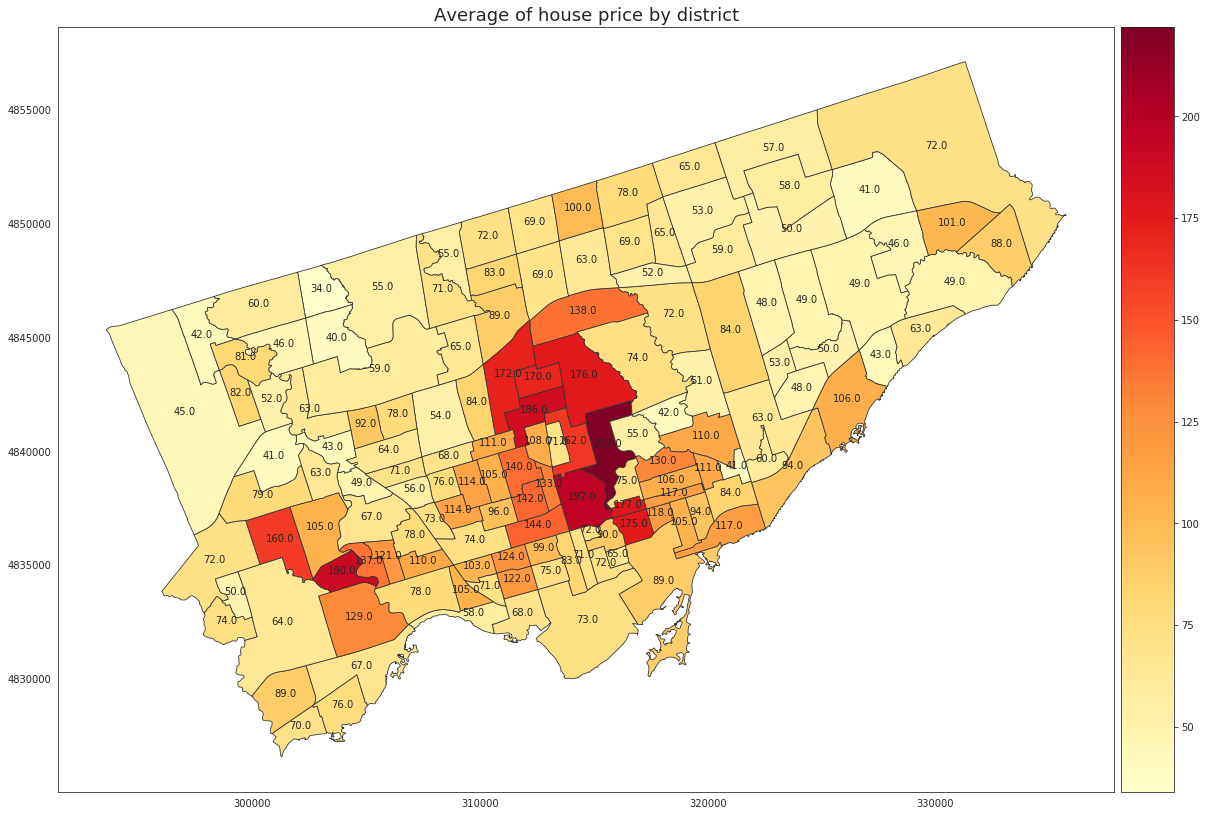

In [259]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize =(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom2.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom2.plot(column='Mean house price', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average of house price by district',fontsize =18)
data_geom2.apply(lambda x: ax.annotate(s=x['Mean house price'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


### 3.1.4 Top 25  average  house price  by district

In [260]:
house_by_neigh =house_by_neighborhood2.head(25)

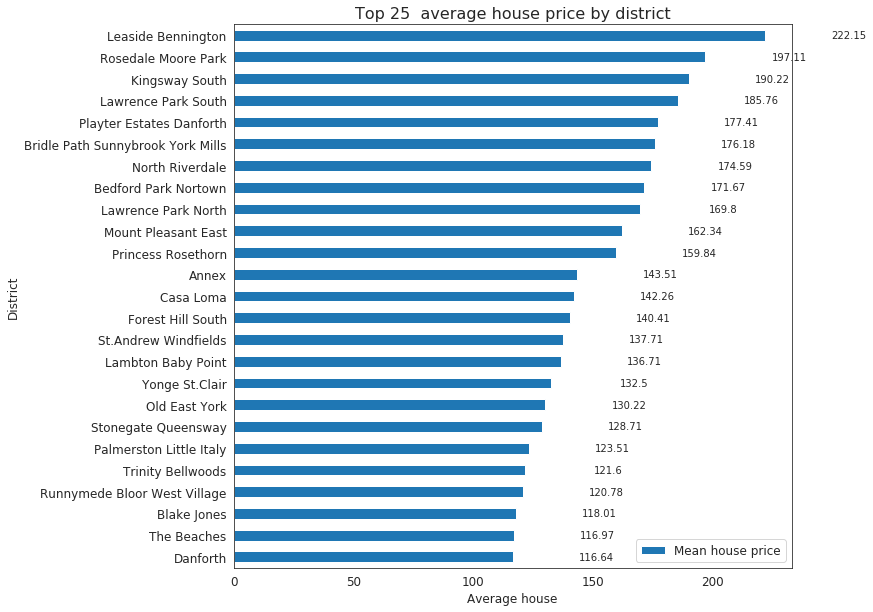

In [261]:
barh_group_size(house_by_neigh,sorted_column = 'Mean house price',x='city_district',y='Mean house price',y_label=('District',12),ticks_font_size=12,x_label=('Average house',12),title =('Top 25  average house price by district',16))

### 3.1.5 Houses price distribution by district

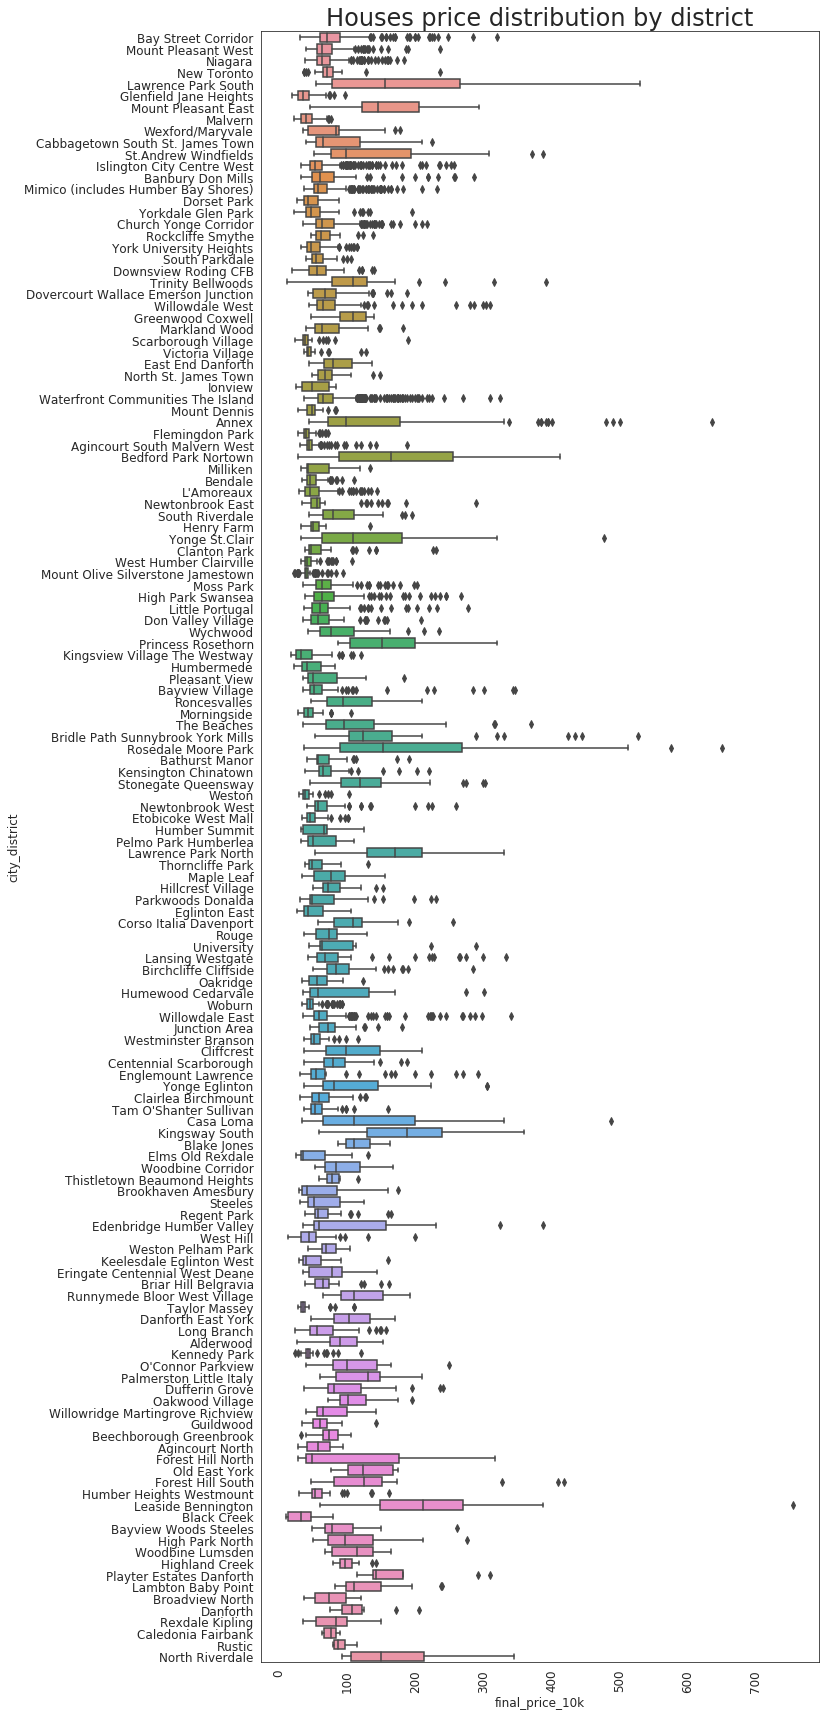

In [262]:
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
data_filtered = house_final_data
plt.ylabel('District',fontsize =12)
plt.yticks(fontsize =12)
plt.xticks(fontsize =12)
plt.xlabel('Houses price', fontsize=12)
plt.title('Houses price distribution by district',fontsize=24)
sns.boxplot(data =data_filtered,y ='city_district',x='final_price_10k',ax =ax)
for label in ax.get_xticklabels():
        label.set_rotation(90)


### 3.1.6 Total houses  by Type

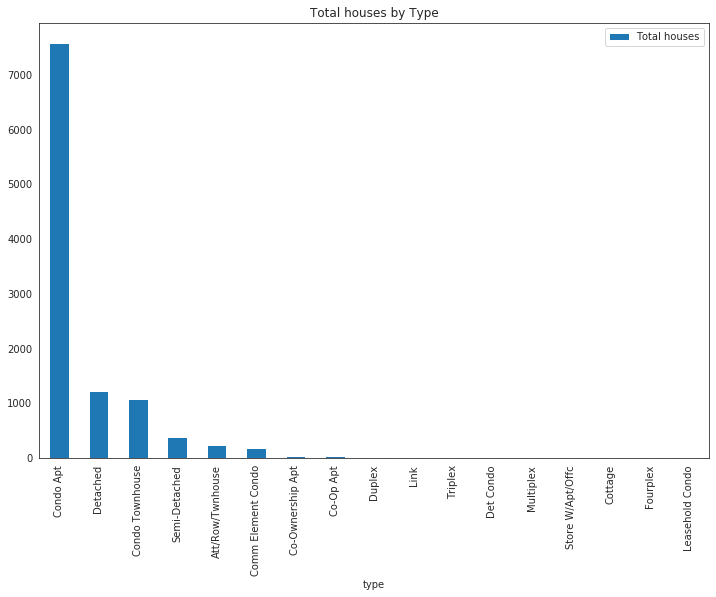

In [263]:
type_data =groupby_size(dataset = house_data_final,columns =['type'],name_of_size = 'Total houses')
ax =type_data.plot(kind='bar',x='type', y='Total houses',figsize =(12,8),title ='Total houses by Type')

### 3.1.7 Houses price distribution by Type


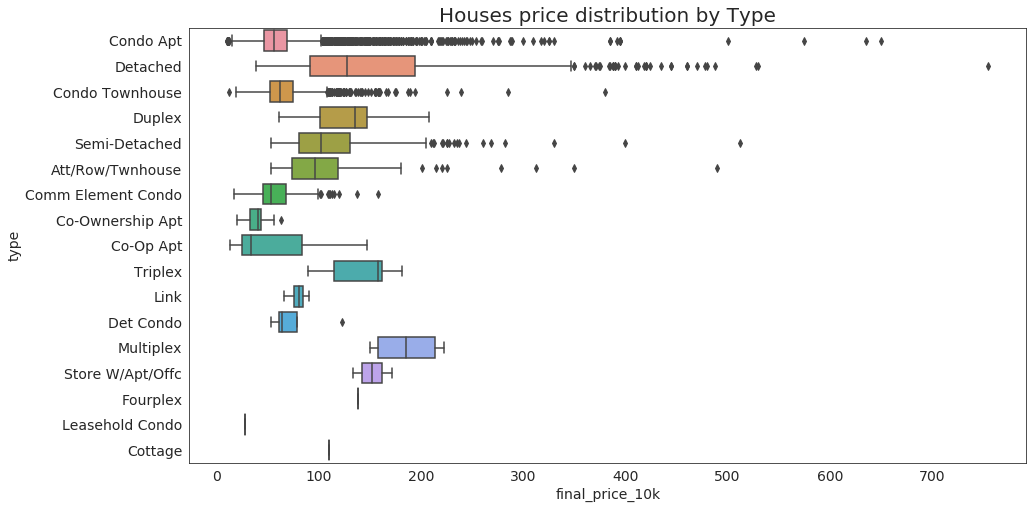

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.ylabel('District',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by Type',fontsize=20)
sns.boxplot(data =house_data_final,x ='final_price_10k',y='type',ax =ax)

### 3.1.8 Houses price distribution by sqft

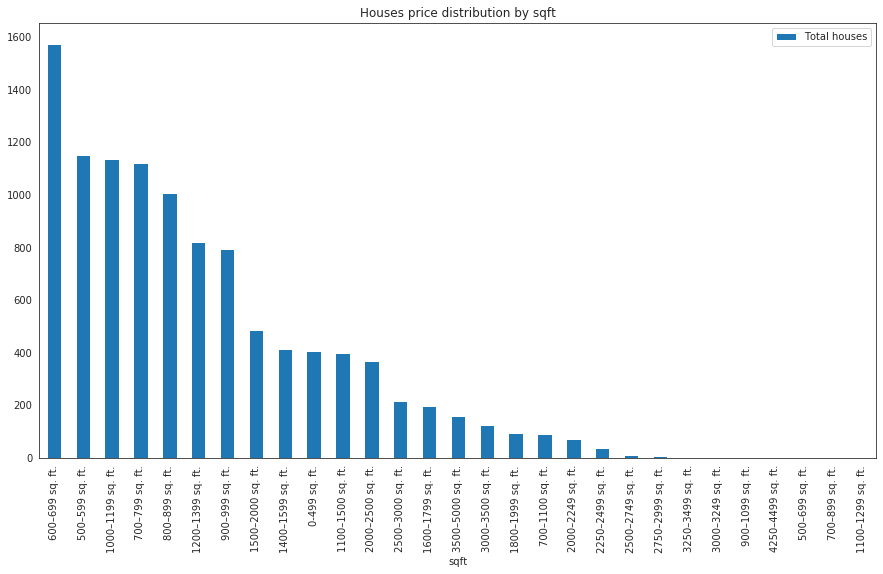

In [265]:
type_data =groupby_size(dataset = house_data_final,columns =['sqft'],name_of_size = 'Total houses')
ax =type_data.plot(kind='bar',x='sqft', y='Total houses',figsize =(15,8),title ='Houses price distribution by sqft')

### 3.1.9 Houses price distribution by sqft

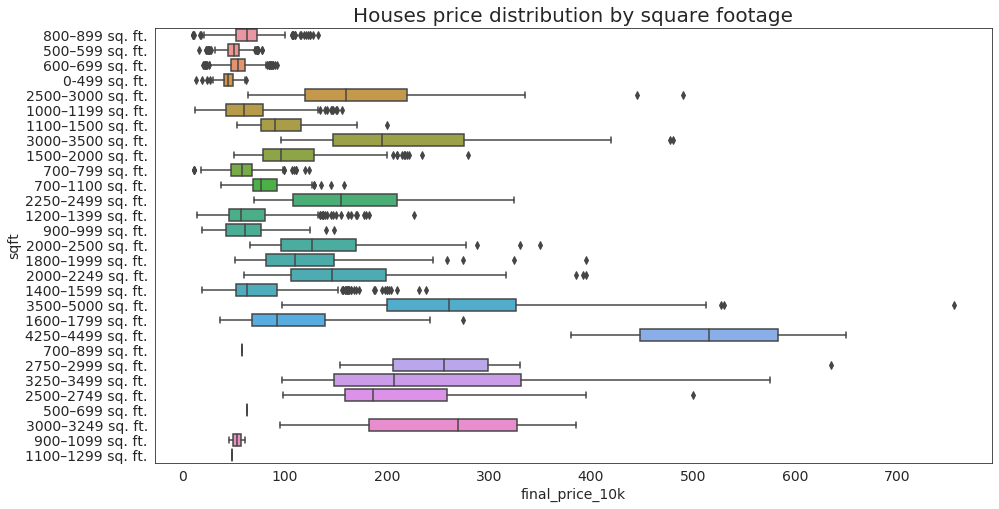

In [266]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
data_filtered = house_final_data
plt.ylabel('District',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by square footage',fontsize=20)
sns.boxplot(data =data_filtered,x ='final_price_10k',y='sqft',ax =ax)

In [267]:
house_final_data.describe()

lat          long  district_code  bedrooms_num  bathrooms_num  \
count  10714.000000  10714.000000   10714.000000  10714.000000   10714.000000   
mean      43.698620    -79.399140      69.324902      2.431118       1.885664   
std        0.058192      0.088568      37.030941      1.236282       1.020692   
min       43.589023    -79.621693       1.000000      0.000000       1.000000   
25%       43.646203    -79.450078      40.000000      2.000000       1.000000   
50%       43.681400    -79.396620      76.000000      2.000000       2.000000   
75%       43.757173    -79.357931      93.000000      3.000000       2.000000   
max       43.837724    -79.124094     140.000000     12.000000      14.000000   

       final_price_10k  mean_district_income_10k  final_price_log  
count     10714.000000              10714.000000     10714.000000  
mean         76.181966                  5.672027        13.405861  
std          51.903968                  3.152057         0.480136  
min          10.300000                  2.600000        11.540000  
25%          48.500000                  3.630000        13.090000  
50%          61.000000                  5.280000        13.320000  
75%          82.500000                  7.060000        13.620000  
max         755.000000                 30.800000        15.840000

### 3.1.8  Distribution plots for numerical values

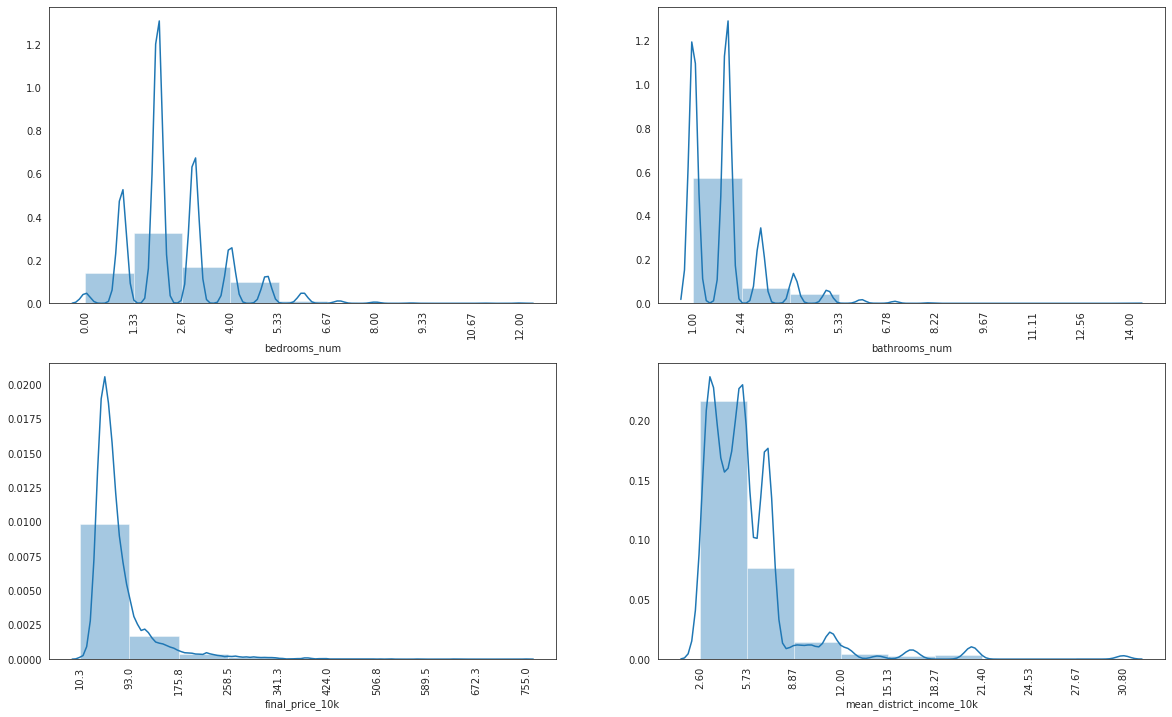

In [268]:
numerical = ['bedrooms_num','bathrooms_num','final_price_10k','mean_district_income_10k']
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
for variable, subplot in zip(numerical, ax.flatten()):
    new_bins = np.linspace(house_final_data[variable].min(),house_data[variable].max(),10)
    subplot.set_xticks(new_bins)
    sns.distplot(house_final_data[variable], ax=subplot,bins=new_bins,kde=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### 3.1.9  regression  plots for numerical values

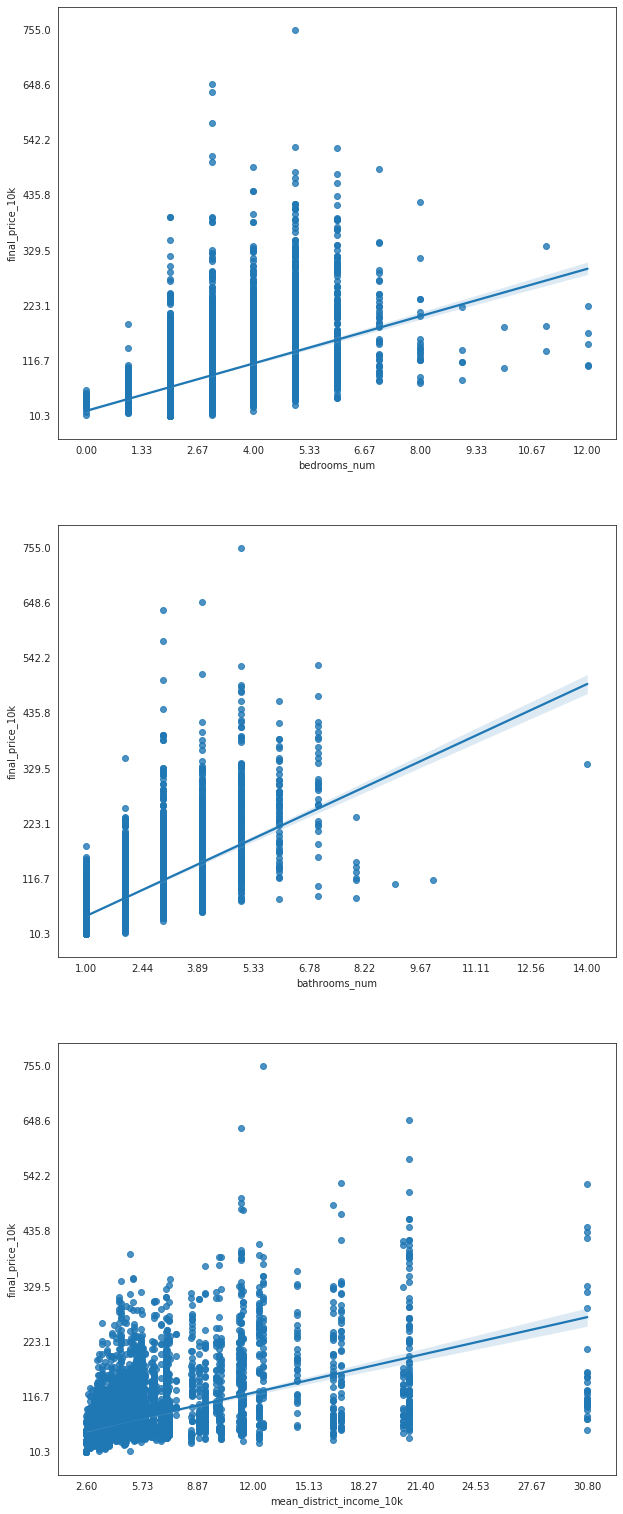

In [269]:
numerical = ['bedrooms_num','bathrooms_num','mean_district_income_10k']
fig, ax = plt.subplots(3,1,figsize=(10, 27))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(house_final_data[variable].min(),house_data[variable].max(),10)
    new_ybins = np.linspace(house_final_data['final_price_10k'].min(),house_data['final_price_10k'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='final_price_10k',data =house_final_data,ax=subplot)
    subplot.set(xlabel=variable,ylabel="final_price_10k")

### 3.1.10 Total Major Crimes Indicator per year and month

In [270]:
df_pivot = mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0].pivot_table(index ='occurrencemonth',columns ='occurrenceyear',values='MCI', aggfunc='count')

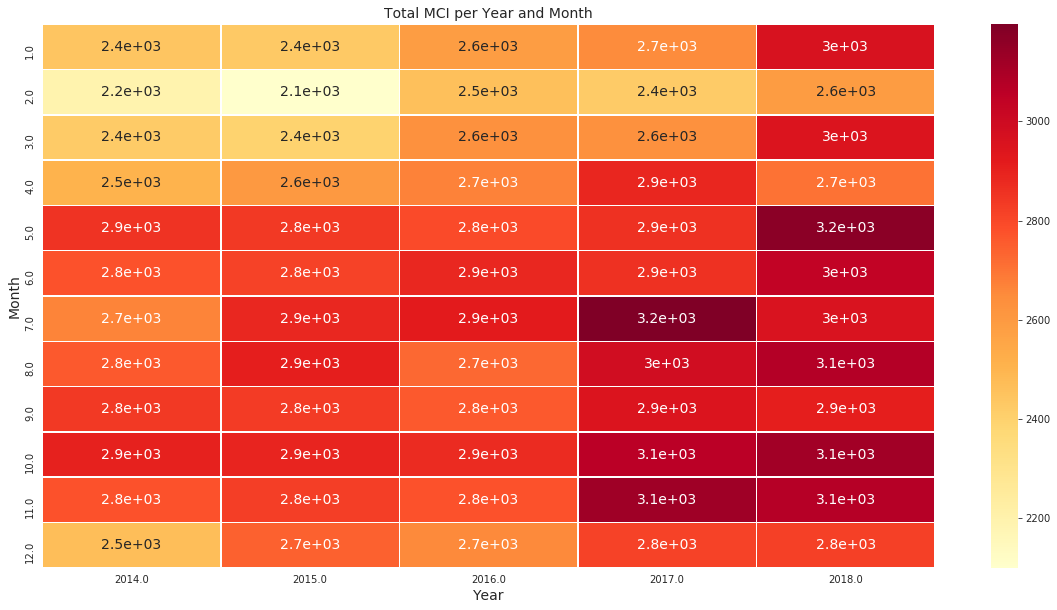

In [271]:
plt.figure(figsize = (20,10))
plt.title('Total MCI per Year and Month',fontsize=14)
sns.heatmap(df_pivot,annot =True, linewidth = 0.6,cmap ='YlOrRd', annot_kws ={'size':14})
plt.xlabel('Year',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

### 3.1.11 Total Major Crimes Indicator per year and month bar chart

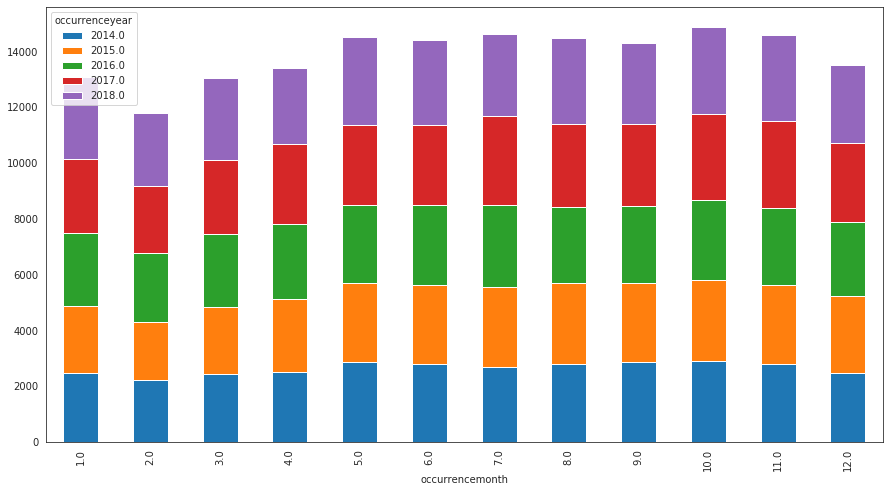

In [272]:
df_pivot.plot(kind='bar',stacked=True,figsize =(15,8))

##### 3.1.11 Average MCI  by district by year

In [273]:
# function to compute group size of columns in dataset
neighbourdhood3 = groupby_size(dataset=mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0],columns =['district_code','occurrenceyear'],name_of_size ='Total of MCI',ascending = False)
neighbourdhood3.head()

district_code  occurrenceyear  Total of MCI
374             75          2018.0          1552
373             75          2017.0          1459
384             77          2018.0          1266
383             77          2017.0          1246
372             75          2016.0          1145

In [274]:
# function to compute group size of columns in dataset
dataset =neighbourdhood3
neighbourdhood4 = groupby_mean_value(dataset=dataset,columns =['district_code'],column_value ='Total of MCI',name_of_size ='Mean of MCI',ascending = False)
data_geom2 = pd.merge(data_goemetry_final,neighbourdhood4, how ='inner',on ='district_code')

In [275]:
data_goemetry_final.head()

district_code  city_district          x          y  \
0             94             94 -79.425515  43.676919   
1            100            100 -79.403590  43.704689   
2             97             97 -79.397871  43.687859   
3             27             27 -79.488883  43.765736   
4             31             31 -79.457108  43.714672   

                                            geometry  
0  POLYGON ((309967.120 4837586.769, 310047.783 4...  
1  POLYGON ((311976.621 4840247.041, 312084.257 4...  
2  POLYGON ((313572.832 4837693.591, 313555.868 4...  
3  POLYGON ((304374.200 4846441.252, 304406.841 4...  
4  POLYGON ((309660.957 4840414.596, 309626.870 4...

In [276]:
data_geom2.shape

(140, 6)

In [318]:
data_geom2.head()

HOODNUM  city_district          x          y  \
0       94             94 -79.425515  43.676919   
1      100            100 -79.403590  43.704689   
2       97             97 -79.397871  43.687859   
3       27             27 -79.488883  43.765736   
4       31             31 -79.457108  43.714672   

                                            geometry  Mean of MCI  
0  POLYGON ((309967.120 4837586.769, 310047.783 4...        124.4  
1  POLYGON ((311976.621 4840247.041, 312084.257 4...         64.6  
2  POLYGON ((313572.832 4837693.591, 313555.868 4...         46.8  
3  POLYGON ((304374.200 4846441.252, 304406.841 4...        623.6  
4  POLYGON ((309660.957 4840414.596, 309626.870 4...        311.8

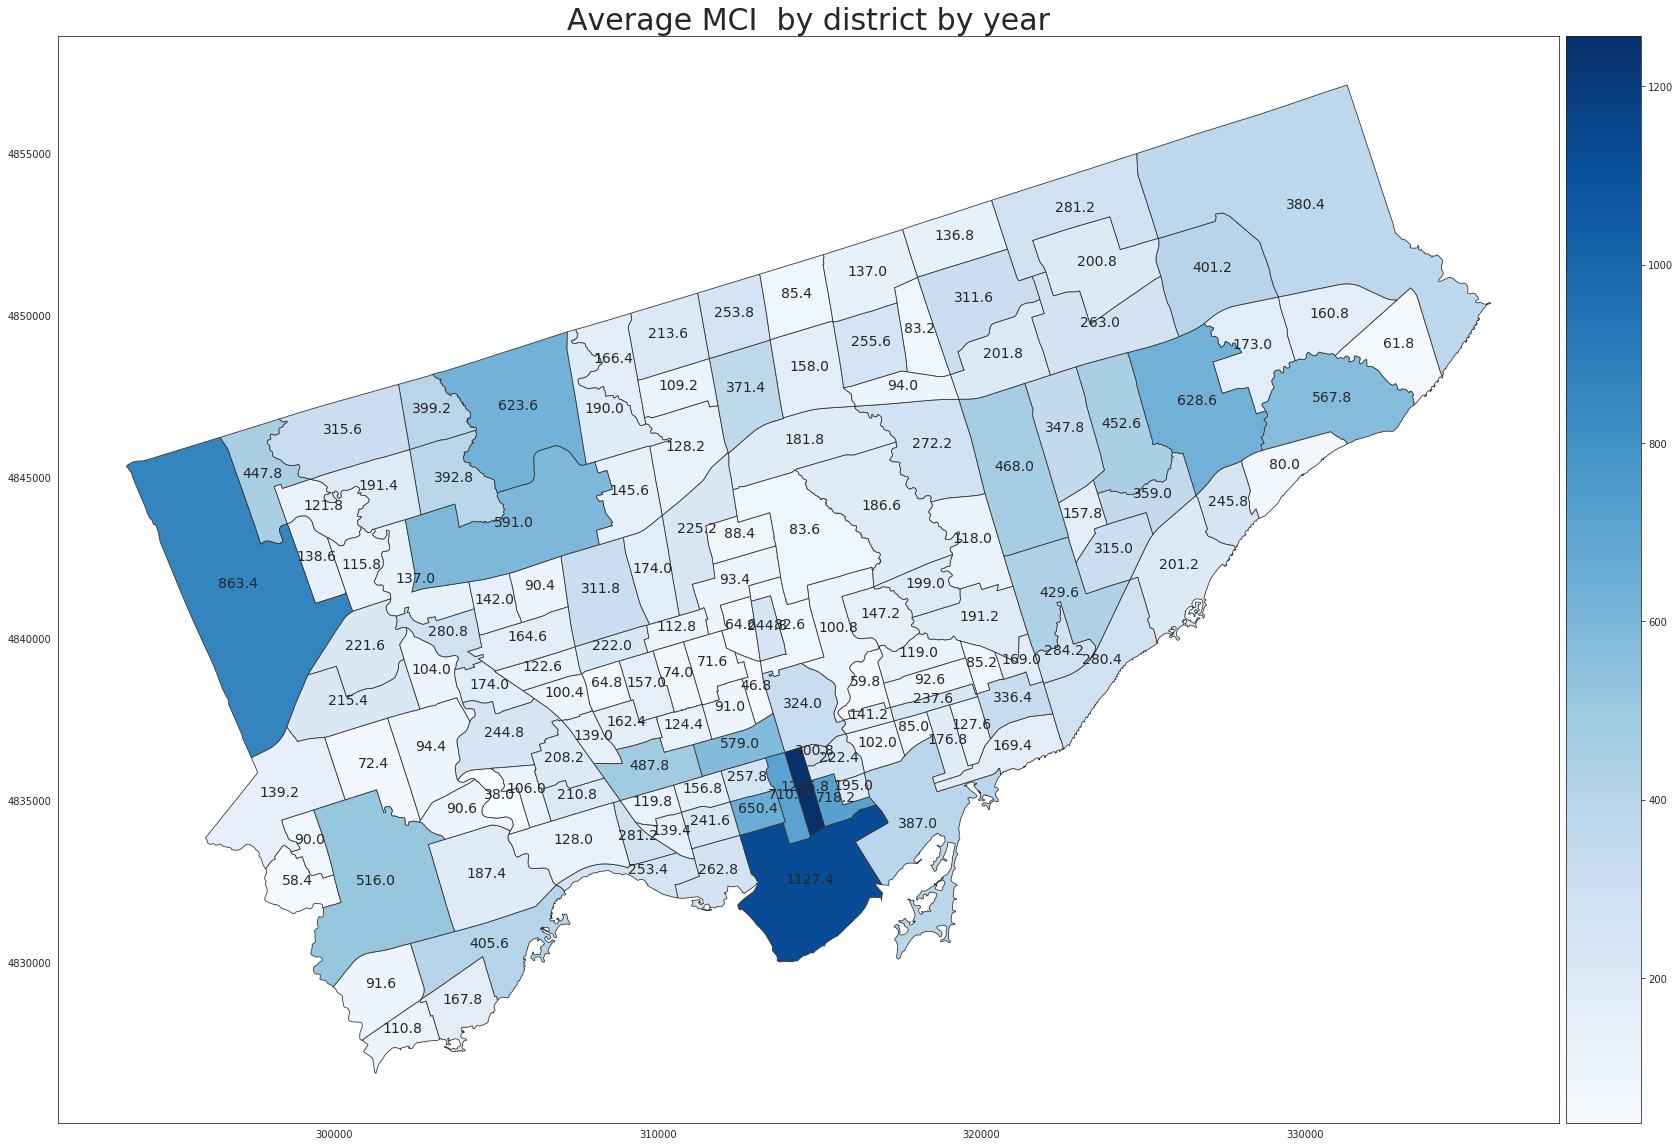

In [325]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =data_geom2.plot(column='Mean of MCI', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average MCI  by district by year',fontsize =30)
data_geom2.apply(lambda x: ax.annotate(s=x['Mean of MCI'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);


### Top 25 Average MCI  by district and month and by district

In [278]:
data2 =neighbourdhood4.head(25)
data2 = pd.merge(data2,data_goemetry_final,how ='inner',on='district_code')

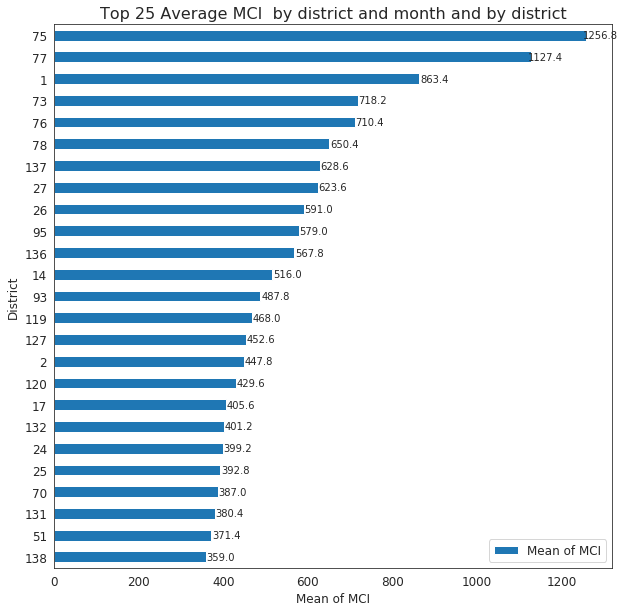

In [279]:
barh_group_size(data2,sorted_column = 'Mean of MCI',x='city_district',y='Mean of MCI',y_label=('District',12),ticks_font_size=12,x_label=('Mean of MCI',12),title =('Top 25 Average MCI  by district and month and by district',16))

## 3.2 Data Analysis Exploratory



In [280]:
house_final_data.shape

(10714, 12)

In [281]:
# improve categorical values to numerics values function
def get_dummies(dataset,columns):
    for column_ in columns:
        data = pd.get_dummies(dataset[column_])
        for column in data.columns:
            dataset[column] = data[column]
    print(dataset.shape)
    return dataset

### 3.2.1 Statistic measures for bedrooms,bathrooms,house prices and average outcomes by district

In [282]:
house_stat_measures = house_final_data.describe()
house_stat_measures

lat          long  district_code  bedrooms_num  bathrooms_num  \
count  10714.000000  10714.000000   10714.000000  10714.000000   10714.000000   
mean      43.698620    -79.399140      69.324902      2.431118       1.885664   
std        0.058192      0.088568      37.030941      1.236282       1.020692   
min       43.589023    -79.621693       1.000000      0.000000       1.000000   
25%       43.646203    -79.450078      40.000000      2.000000       1.000000   
50%       43.681400    -79.396620      76.000000      2.000000       2.000000   
75%       43.757173    -79.357931      93.000000      3.000000       2.000000   
max       43.837724    -79.124094     140.000000     12.000000      14.000000   

       final_price_10k  mean_district_income_10k  final_price_log  
count     10714.000000              10714.000000     10714.000000  
mean         76.181966                  5.672027        13.405861  
std          51.903968                  3.152057         0.480136  
min          10.300000                  2.600000        11.540000  
25%          48.500000                  3.630000        13.090000  
50%          61.000000                  5.280000        13.320000  
75%          82.500000                  7.060000        13.620000  
max         755.000000                 30.800000        15.840000

### 3.2.2 Statistical measures of square footage,district,type ,parking values

In [283]:
house_final_data1 = get_dummies(house_final_data,columns=['city_district','type','sqft','parking']).copy()

(10714, 223)


In [284]:
house_final_data2 = house_final_data1[ [column for column in house_final_data1.columns.values if column not in ['bedrooms_num','bathrooms_num','final_price_10k','mean_district_income_10k','final_price_log','district_code'] ]]

In [285]:
house_final_data2.head()

lat       long       type        city_district               sqft  \
0  43.661896 -79.385748  Condo Apt  Bay Street Corridor    800–899 sq. ft.   
2  43.708472 -79.397498  Condo Apt  Mount Pleasant West    500–599 sq. ft.   
3  43.638399 -79.414448  Condo Apt              Niagara    600–699 sq. ft.   
5  43.601518 -79.510062  Condo Apt          New Toronto      0-499 sq. ft.   
6  43.714068 -79.403338   Detached  Lawrence Park South  2500–3000 sq. ft.   

      parking  Agincourt North  Agincourt South Malvern West  Alderwood  \
0   1 parking                0                             0          0   
2  no parking                0                             0          0   
3   1 parking                0                             0          0   
5   1 parking                0                             0          0   
6   2 parking                0                             0          0   

   Annex  Banbury Don Mills  Bathurst Manor  Bay Street Corridor  \
0      0                  0               0                    1   
2      0                  0               0                    0   
3      0                  0               0                    0   
5      0                  0               0                    0   
6      0                  0               0                    0   

   Bayview Village  Bayview Woods Steeles  Bedford Park Nortown  \
0                0                      0                     0   
2                0                      0                     0   
3                0                      0                     0   
5                0                      0                     0   
6                0                      0                     0   

   Beechborough Greenbrook  Bendale  Birchcliffe Cliffside  Black Creek  \
0                        0        0                      0            0   
2                        0        0                      0            0   
3                        0        0                      0            0   
5                        0        0                      0            0   
6                        0        0                      0            0   

   Blake Jones  Briar Hill Belgravia  Bridle Path Sunnybrook York Mills  \
0            0                     0                                  0   
2            0                     0                                  0   
3            0                     0                                  0   
5            0                     0                                  0   
6            0                     0                                  0   

   Broadview North  Brookhaven Amesbury  Cabbagetown South St. James Town  \
0                0                    0                                 0   
2                0                    0                                 0   
3                0                    0                                 0   
5                0                    0                                 0   
6                0                    0                                 0   

   Caledonia Fairbank  Casa Loma  Centennial Scarborough  \
0                   0          0                       0   
2                   0          0                       0   
3                   0          0                       0   
5                   0          0                       0   
6                   0          0                       0   

   Church Yonge Corridor  Clairlea Birchmount  Clanton Park  Cliffcrest  \
0                      0                    0             0           0   
2                      0                    0             0           0   
3                      0                    0             0           0   
5                      0                    0             0           0   
6                      0                    0             0           0   

   Corso Italia Davenport  Danforth  Danforth East York  Don Valley Village  \
0                    

In [286]:
house_final_data2.describe().transpose().sort_values(by =['mean'],ascending =False).head(15)

count       mean       std        min  \
lat                                10714.0  43.698620  0.058192  43.589023   
Condo Apt                          10714.0   0.706272  0.455490   0.000000   
1 parking                          10714.0   0.670711  0.469977   0.000000   
600–699 sq. ft.                    10714.0   0.146911  0.354033   0.000000   
no parking                         10714.0   0.146631  0.353754   0.000000   
2 parking                          10714.0   0.118723  0.323478   0.000000   
Detached                           10714.0   0.113590  0.317327   0.000000   
500–599 sq. ft.                    10714.0   0.107616  0.309910   0.000000   
Waterfront Communities The Island  10714.0   0.106870  0.308962   0.000000   
1000–1199 sq. ft.                  10714.0   0.106029  0.307890   0.000000   
700–799 sq. ft.                    10714.0   0.104629  0.306090   0.000000   
Condo Townhouse                    10714.0   0.099123  0.298841   0.000000   
800–899 sq. ft.                    10714.0   0.093989  0.291827   0.000000   
1200–1399 sq. ft.                  10714.0   0.076722  0.266162   0.000000   
900–999 sq. ft.                    10714.0   0.074202  0.262112   0.000000   

                                         25%      50%        75%        max  
lat                                43.646203  43.6814  43.757173  43.837724  
Condo Apt                           0.000000   1.0000   1.000000   1.000000  
1 parking                           0.000000   1.0000   1.000000   1.000000  
600–699 sq. ft.                     0.000000   0.0000   0.000000   1.000000  
no parking                          0.000000   0.0000   0.000000   1.000000  
2 parking                           0.000000   0.0000   0.000000   1.000000  
Detached                            0.000000   0.0000   0.000000   1.000000  
500–599 sq. ft.                     0.000000   0.0000   0.000000   1.000000  
Waterfront Communities The Island   0.000000   0.0000   0.000000   1.000000  
1000–1199 sq. ft.                   0.000000   0.0000   0.000000   1.000000  
700–799 sq. ft.                     0.000000   0.0000   0.000000   1.000000  
Condo Townhouse                     0.000000   0.0000   0.000000   1.000000  
800–899 sq. ft.                     0.000000   0.0000   0.000000   1.000000  
1200–1399 sq. ft.                   0.000000   0.0000   0.000000   1.000000  
900–999 sq. ft.                     0.000000   0.0000   0.000000   1.000000

### 3.2.3 inferential statistical testing

#### 3.2.3.1 Outliters and  Correlation matrix

In [287]:
QI = house_stat_measures['final_price_10k']['75%']- house_stat_measures['final_price_10k']['25%']
median = house_stat_measures['final_price_10k']['50%']

In [288]:
house_final_data_without_outliers = house_final_data[(house_final_data.final_price_10k >= median -1.5*QI) & (house_final_data.final_price_10k <= median +1.5*QI) ]
house_final_data_without_outliers.head()
print('before outliers :',house_final_data.shape )
print('after outliers :' ,house_final_data_without_outliers.shape )

before outliers : (10714, 223)
after outliers : (9316, 223)


In [289]:
house_price_corr=house_final_data_without_outliers.corr().final_price_10k.to_frame()
house_price_corr= house_price_corr[np.abs(house_price_corr.final_price_10k) >0.1]

In [290]:
house_price_corr

final_price_10k
lat                                      -0.244658
bedrooms_num                              0.407472
bathrooms_num                             0.476865
final_price_10k                           1.000000
mean_district_income_10k                  0.312169
final_price_log                           0.977095
Malvern                                  -0.145289
Mount Olive Silverstone Jamestown        -0.100134
Waterfront Communities The Island         0.132284
Att/Row/Twnhouse                          0.156496
Condo Apt                                -0.304619
Detached                                  0.341589
Semi-Detached                             0.189517
0-499 sq. ft.                            -0.175039
1100–1500 sq. ft.                         0.230418
1500–2000 sq. ft.                         0.235493
2000–2500 sq. ft.                         0.208644
2500–3000 sq. ft.                         0.133949
500–599 sq. ft.                          -0.201203
600–699 sq. ft.                          -0.145332
1 parking                                -0.130546
2 parking                                 0.197584
3 parking                                 0.125290
4 parking                                 0.175973
no parking                               -0.107994

#### 3.2.3.2 Anova test of parking values (1 parking, 2 parking, 3 parking, 4 parking and Others)

In [291]:
house_final_data_without_outliers1 = house_final_data_without_outliers[['lat','long','type','city_district','district_code','sqft','parking','bedrooms_num','bathrooms_num','final_price_10k','mean_district_income_10k']]

In [292]:
parking_list = list(set(house_final_data_without_outliers1.parking))
parking_selected_list = [item for item in parking_list if item in house_price_corr.index.values]
parking_remove_list = [item for item in parking_list if item not in house_price_corr.index.values]
parking_house_price = house_final_data[['parking','final_price_10k']]
group1 = parking_house_price['final_price_10k'][parking_house_price.parking == '1 parking']
group2 = parking_house_price['final_price_10k'][parking_house_price.parking == '2 parking']
group3 = parking_house_price['final_price_10k'][parking_house_price.parking == '3 parking']
group4 = parking_house_price['final_price_10k'][parking_house_price.parking == '4 parking']
group5 = parking_house_price['final_price_10k'][parking_house_price.parking == '5 parking']
group6 = parking_house_price.set_index('parking').loc[parking_remove_list].reset_index('parking')['final_price_10k']

In [293]:
for i in house_final_data_without_outliers1.index.values:
    if house_final_data_without_outliers1.at[i,'parking'] in parking_remove_list:
        house_final_data_without_outliers1.at[i,'parking'] = 'more than 5 parking'


In [294]:
print(stats.f_oneway(group1,group2,group3,group4,group5,group6))
mc = MultiComparison(house_final_data_without_outliers1['final_price_10k'], house_final_data_without_outliers1['parking'])
mc_results = mc.tukeyhsd()
print(mc_results)

F_onewayResult(statistic=577.0192388858342, pvalue=0.0)
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
          1 parking           2 parking   13.476  0.001  11.6064  15.3456   True
          1 parking           3 parking  22.1072  0.001  17.4461  26.7683   True
          1 parking           4 parking  28.3881  0.001  24.0482   32.728   True
          1 parking more than 5 parking  22.9868  0.001  17.0322  28.9413   True
          1 parking          no parking  -3.0254  0.001  -4.4386  -1.6122   True
          2 parking           3 parking   8.6312  0.001   3.6826  13.5798   True
          2 parking           4 parking  14.9121  0.001  10.2648  19.5595   True
          2 parking more than 5 parking   9.5108  0.001   3.3286  15.6929   True
          2 parking          no parking -16.5014  0.0

#### 3.2.3.2 Anova  test  of square footage values 

In [295]:
sqft_list = list(set(house_final_data_without_outliers1.sqft))
sqft_selected_list = [item for item in sqft_list if item in house_price_corr.index.values]
sqft_remove_list = [item for item in sqft_list if item not in house_price_corr.index.values]
print(sqft_selected_list)

['0-499 sq. ft.', '2000–2500 sq. ft.', '1500–2000 sq. ft.', '600–699 sq. ft.', '1100–1500 sq. ft.', '500–599 sq. ft.', '2500–3000 sq. ft.']


In [296]:
sqft_house_price = house_final_data_without_outliers1[['sqft','final_price_10k']]
group1 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '600–699 sq. ft.']
group2 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '2000–2500 sq. ft.']
group3 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '500–599 sq. ft.']
group4 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '1500–2000 sq. ft.']
group5 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '1100–1500 sq. ft.']
group6 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '0-499 sq. ft.']
group7 = sqft_house_price['final_price_10k'][sqft_house_price.sqft == '2500–3000 sq. ft.']
group8 = sqft_house_price.set_index('sqft').loc[sqft_remove_list].reset_index('sqft')['final_price_10k']

In [297]:
for i in house_final_data_without_outliers1.index.values:
    if house_final_data_without_outliers1.at[i,'sqft'] in sqft_remove_list:
        house_final_data_without_outliers1.at[i,'sqft'] = 'Others'

In [298]:
stats.f_oneway(group1,group2,group3,group4,group5,group6,group7,group8)
print(stats.f_oneway(group1,group2,group3,group4,group5,group6,group7,group8))
mc = MultiComparison(house_final_data_without_outliers1['final_price_10k'], house_final_data_without_outliers1['sqft'])
mc_results = mc.tukeyhsd()
print(mc_results)

F_onewayResult(statistic=445.4328669132003, pvalue=0.0)
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2      meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------
    0-499 sq. ft. 1100–1500 sq. ft.  38.6817  0.001  34.9741  42.3894   True
    0-499 sq. ft. 1500–2000 sq. ft.  38.4232  0.001  34.7828  42.0637   True
    0-499 sq. ft. 2000–2500 sq. ft.  45.9933  0.001  41.2776  50.7091   True
    0-499 sq. ft. 2500–3000 sq. ft.  53.5328  0.001  45.3453  61.7203   True
    0-499 sq. ft.   500–599 sq. ft.   5.1959  0.001   2.4151   7.9766   True
    0-499 sq. ft.   600–699 sq. ft.   9.1138  0.001    6.432  11.7956   True
    0-499 sq. ft.            Others  16.3204  0.001   13.842  18.7989   True
1100–1500 sq. ft. 1500–2000 sq. ft.  -0.2585    0.9  -4.2053   3.6882  False
1100–1500 sq. ft. 2000–2500 sq. ft.   7.3116  0.001   2.3556  12.2676   True
1100–1500 sq. ft. 25

#### 3.2.3.3 Anova  test  of house  type

In [299]:
type_list = list(set(house_final_data_without_outliers1.type))
type_selected_list = [item for item in type_list if item in house_price_corr.index.values]
type_remove_list = [item for item in type_list if item not in house_price_corr.index.values]
print(type_selected_list)

['Detached', 'Condo Apt', 'Semi-Detached', 'Att/Row/Twnhouse']


In [300]:
type_house_price = house_final_data_without_outliers1[['type','final_price_10k']]
group1 = type_house_price['final_price_10k'][type_house_price.type == 'Detached']
group2 = type_house_price['final_price_10k'][type_house_price.type == 'Condo Apt']
group3 = type_house_price['final_price_10k'][type_house_price.type == 'Semi-Detached']
group4 = type_house_price['final_price_10k'][type_house_price.type == 'Att/Row/Twnhouse']
group5 = type_house_price.set_index('type').loc[type_remove_list].reset_index('type')['final_price_10k']

In [301]:
for i in house_final_data_without_outliers1.index.values:
    if house_final_data_without_outliers1.at[i,'type'] in type_remove_list:
        house_final_data_without_outliers1.at[i,'type'] = 'Other types'

In [302]:
print(stats.f_oneway(group1,group2,group3,group4,group5))
mc = MultiComparison(house_final_data_without_outliers1['final_price_10k'], house_final_data_without_outliers1['type'])
mc_results = mc.tukeyhsd()
print(mc_results)

F_onewayResult(statistic=548.4837233126107, pvalue=0.0)
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2    meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------
Att/Row/Twnhouse     Condo Apt  -25.219  0.001 -28.8959 -21.5422   True
Att/Row/Twnhouse      Detached   4.4051 0.0323   0.2361    8.574   True
Att/Row/Twnhouse   Other types -21.7832  0.001 -25.6397 -17.9266   True
Att/Row/Twnhouse Semi-Detached   0.9786    0.9   -3.831   5.7883  False
       Condo Apt      Detached  29.6241  0.001  27.5204  31.7278   True
       Condo Apt   Other types   3.4358  0.001   2.0508   4.8209   True
       Condo Apt Semi-Detached  26.1977  0.001  23.0074   29.388   True
        Detached   Other types -26.1882  0.001 -28.5923 -23.7842   True
        Detached Semi-Detached  -3.4264 0.0917  -7.1733   0.3204  False
     Other types Semi-Detached  22.7618  0.001   19.366  26.1576   True
--------

#### 3.2.3.4 Anova  test  city_district 

In [303]:
city_district_list = list(set(house_final_data_without_outliers1.city_district))
city_district_selected_list = [item for item in city_district_list if item in house_price_corr.index.values]
city_district_remove_list = [item for item in city_district_list if item not in house_price_corr.index.values]
print(city_district_selected_list)

['Mount Olive Silverstone Jamestown', 'Malvern', 'Waterfront Communities The Island']


In [304]:
city_district_price = house_final_data_without_outliers1[['city_district','final_price_10k']]
group1 = city_district_price['final_price_10k'][city_district_price.city_district == 'Malvern']
group2 = city_district_price['final_price_10k'][city_district_price.city_district == 'Waterfront Communities The Island']
group3 = city_district_price['final_price_10k'][city_district_price.city_district == 'Mount Olive Silverstone Jamestown']
group4 = city_district_price.set_index('city_district').loc[city_district_remove_list].reset_index('city_district')['final_price_10k']

In [305]:
for i in house_final_data_without_outliers1.index.values:
    if house_final_data_without_outliers1.at[i,'city_district'] in city_district_remove_list:
        house_final_data_without_outliers1.at[i,'city_district'] = 'Other districts'

In [306]:
print(stats.f_oneway(group1,group2,group3,group4))
mc = MultiComparison(house_final_data_without_outliers1['final_price_10k'], house_final_data_without_outliers1['city_district'])
mc_results = mc.tukeyhsd()
print(mc_results)

F_onewayResult(statistic=150.76926896237046, pvalue=2.059494219419834e-95)
                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
              group1                            group2              meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------------------------------
                          Malvern Mount Olive Silverstone Jamestown   0.5606   0.9 -5.4487  6.5698  False
                          Malvern                   Other districts  19.0383 0.001 15.5112 22.5655   True
                          Malvern Waterfront Communities The Island  26.0679 0.001  22.304 29.8317   True
Mount Olive Silverstone Jamestown                   Other districts  18.4778 0.001  13.558 23.3975   True
Mount Olive Silverstone Jamestown Waterfront Communities The Island  25.5073 0.001 20.4152 30.5995   True
                  Other districts Waterfront Communities The Island   7.0295 

In [307]:
house_final_data_without_outliers2 =get_dummies(house_final_data_without_outliers1,columns=['city_district','type','sqft','parking']).copy()
house_final_data_without_outliers2.head()

(9316, 34)


lat       long         type    city_district  district_code  \
0  43.661896 -79.385748    Condo Apt  Other districts             76   
2  43.708472 -79.397498    Condo Apt  Other districts            104   
3  43.638399 -79.414448    Condo Apt  Other districts             82   
5  43.601518 -79.510062    Condo Apt  Other districts             18   
7  43.749437 -79.516848  Other types  Other districts             25   

              sqft     parking  bedrooms_num  bathrooms_num  final_price_10k  \
0           Others   1 parking           3.0            2.0             85.5   
2  500–599 sq. ft.  no parking           1.0            1.0             55.0   
3  600–699 sq. ft.   1 parking           2.0            1.0             66.5   
5    0-499 sq. ft.   1 parking           0.0            1.0             36.8   
7           Others   1 parking           3.0            2.0             20.0   

   mean_district_income_10k  Malvern  Mount Olive Silverstone Jamestown  \
0                      5.65        0                                  0   
2                      5.70        0                                  0   
3                      7.06        0                                  0   
5                      4.41        0                                  0   
7                      2.80        0                                  0   

   Other districts  Waterfront Communities The Island  Att/Row/Twnhouse  \
0                1                                  0                 0   
2                1                                  0                 0   
3                1                                  0                 0   
5                1                                  0                 0   
7                1                                  0                 0   

   Condo Apt  Detached  Other types  Semi-Detached  0-499 sq. ft.  \
0          1         0            0              0              0   
2          1         0            0              0              0   
3          1         0            0              0              0   
5          1         0            0              0              1   
7          0         0            1              0              0   

   1100–1500 sq. ft.  1500–2000 sq. ft.  2000–2500 sq. ft.  2500–3000 sq. ft.  \
0                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
5                  0                  0                  0                  0   
7                  0                  0                  0                  0   

   500–599 sq. ft.  600–699 sq. ft.  Others  1 parking  2 parking  3 parking  \
0                0                0       1          1          0          0   
2                1                0       0          0          0          0   
3                0                1       0          1          0          0   
5                0                0       0          1          0          0   
7                0                0       1          1          0          0   

   4 parking  more than 5 parking  no parking  
0          0                    0           0  
2          0                    0           1  
3          0                    0           0  
5          0                    0           0  
7          0                    0           0

## 3.3 Dimension  reduction

In [308]:
selected_features = ['bedrooms_num','bathrooms_num','mean_district_income_10k','Att/Row/Twnhouse','Condo Apt','Detached','Other types','Semi-Detached','Malvern','Mount Olive Silverstone Jamestown','Other districts','Waterfront Communities The Island','0-499 sq. ft.','1100–1500 sq. ft.','1500–2000 sq. ft.','2000–2500 sq. ft.','2500–3000 sq. ft.','500–599 sq. ft.','600–699 sq. ft.','Others','1 parking','2 parking','3 parking','4 parking','more than 5 parking','no parking']
house_final_data_without_outliers2=house_final_data_without_outliers2[selected_features]
print('house dataset with selected features :',house_final_data_without_outliers2.shape)

house_final_data_without_outliers2.head()

house dataset with selected features : (9316, 26)


bedrooms_num  bathrooms_num  mean_district_income_10k  Att/Row/Twnhouse  \
0           3.0            2.0                      5.65                 0   
2           1.0            1.0                      5.70                 0   
3           2.0            1.0                      7.06                 0   
5           0.0            1.0                      4.41                 0   
7           3.0            2.0                      2.80                 0   

   Condo Apt  Detached  Other types  Semi-Detached  Malvern  \
0          1         0            0              0        0   
2          1         0            0              0        0   
3          1         0            0              0        0   
5          1         0            0              0        0   
7          0         0            1              0        0   

   Mount Olive Silverstone Jamestown  Other districts  \
0                                  0                1   
2                                  0                1   
3                                  0                1   
5                                  0                1   
7                                  0                1   

   Waterfront Communities The Island  0-499 sq. ft.  1100–1500 sq. ft.  \
0                                  0              0                  0   
2                                  0              0                  0   
3                                  0              0                  0   
5                                  0              1                  0   
7                                  0              0                  0   

   1500–2000 sq. ft.  2000–2500 sq. ft.  2500–3000 sq. ft.  500–599 sq. ft.  \
0                  0                  0                  0                0   
2                  0                  0                  0                1   
3                  0                  0                  0                0   
5                  0                  0                  0                0   
7                  0                  0                  0                0   

   600–699 sq. ft.  Others  1 parking  2 parking  3 parking  4 parking  \
0                0       1          1          0          0          0   
2                0       0          0          0          0          0   
3                1       0          1          0          0          0   
5                0       0          1          0          0          0   
7                0       1          1          0          0          0   

   more than 5 parking  no parking  
0                    0           0  
2                    0           1  
3                    0           0  
5                    0           0  
7                    0           0

In [309]:
X = house_final_data_without_outliers2
y=house_final_data_without_outliers1.final_price_10k
grid_params = [
    {
        "n_estimators": [0,5,10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5,10],
    }
]

clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(X, y)

print("Best parameter values: %r\n" % clf.best_params_)


Best parameter values: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}



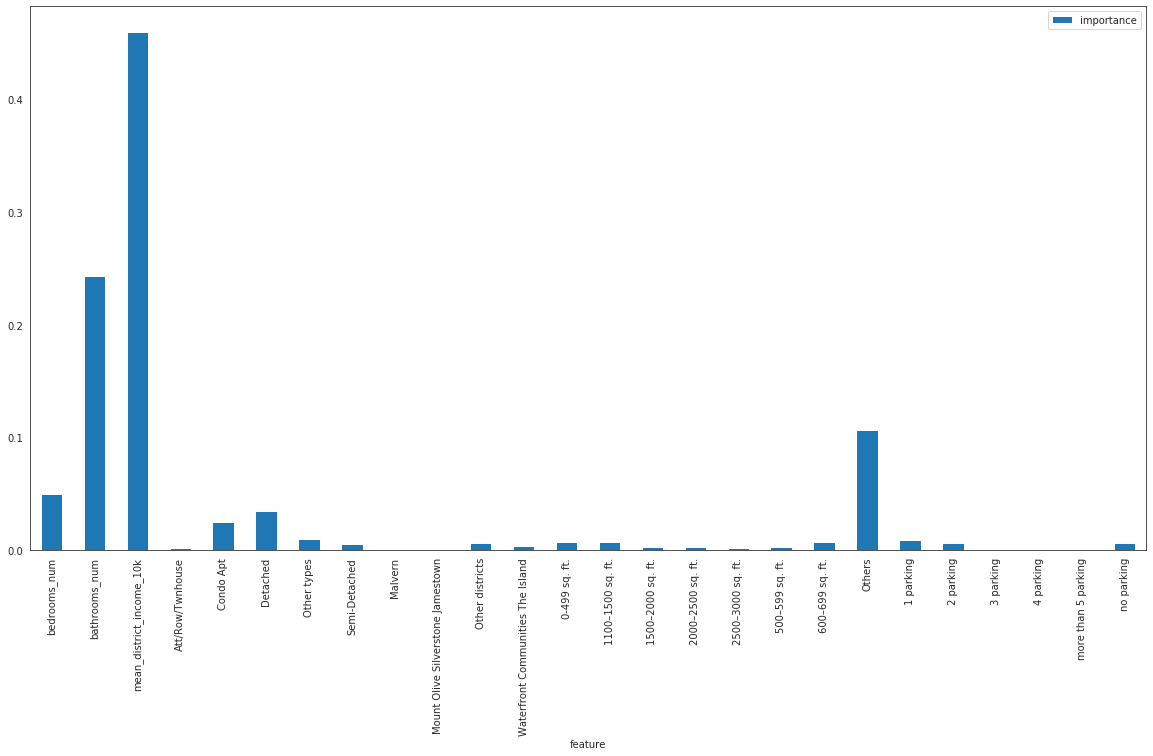

In [310]:
rf = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_leaf =2,random_state =49)
rf.fit(X,y)
importance = pd.DataFrame({"feature": house_final_data_without_outliers2.columns.values, "importance": rf.feature_importances_})
importance.plot(kind='bar',x='feature',y='importance',figsize =(20,10))

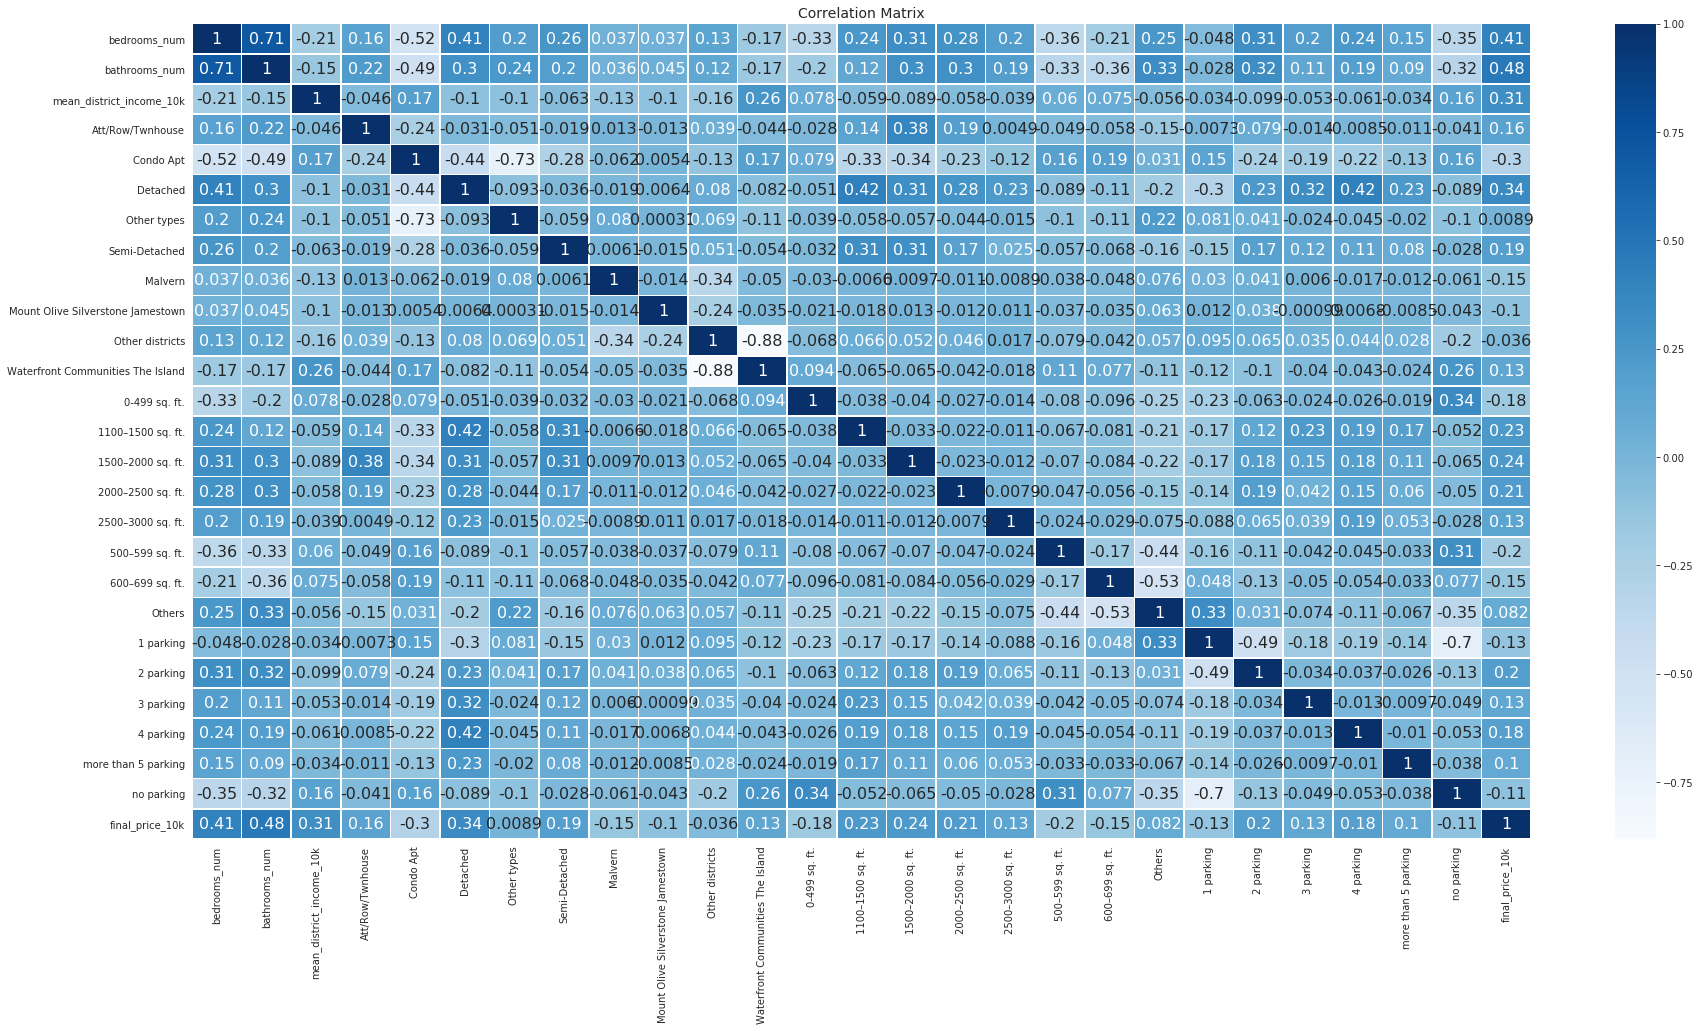

In [311]:
house_final_data_without_outliers2['final_price_10k']= y
plt.figure(figsize = (30,15))
plt.title('Correlation Matrix',fontsize=14)
sns.heatmap(house_final_data_without_outliers2.corr(),annot =True, linewidth = 0.6,cmap ='Blues', annot_kws ={'size':16})

### Average MCI  by district by year

# 4. Predictive Modeling

In [ ]:
grid_params = [
    {
        "n_estimators": [0,5,10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5,10],
    }
]

clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(X, y)

print("Best parameter values: %r\n" % clf.best_params_)

In [313]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from  sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [314]:
def predictive_model (dataset =house_data ,include_bias=False,poly_degree=3, alpha =1.0,random_state =49,learning_rate =0.05,test_size =0.15,target_variable ='final_price_10k',corr_rate_value = 0.1):
    model_dictionary = dict()
    data_filtered = dataset.corr()
    data_filtered.loc[np.abs(data_filtered[target_variable])>corr_rate_value,target_variable]
    features = data_filtered.loc[(np.abs(data_filtered[target_variable])>corr_rate_value) & (np.abs(data_filtered[target_variable]) <1.0),target_variable].index.values
    print(features)
    X = dataset[features]
    y = dataset['final_price_10k']
    X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)
    lr = LinearRegression()
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias)),('model',LinearRegression())]
    pipe1 = Pipeline(inputs)
    rm=Ridge(alpha=alpha)
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias,degree =poly_degree)),('model',Ridge(alpha=alpha))]
    pipe2 = Pipeline(inputs)
    abr = AdaBoostRegressor(random_state =random_state,learning_rate =learning_rate)
    rfr = RandomForestRegressor(random_state =random_state)
    gbr = GradientBoostingRegressor(random_state =random_state,learning_rate =learning_rate)
    xtr = ExtraTreesRegressor(random_state =random_state)
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,max_depth = 5, alpha = 10, n_estimators = 10)
    br = BaggingRegressor(random_state =random_state)
    model_dictionary['model_name'] = ['LinearRegression','Ridge','Polynomial with Linear','Polynomial Ridge','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','ExtraTreesRegressor','xgboost','BaggingRegressor']
    model_dictionary['model'] = [lr,rm,pipe1,pipe2,rfr,abr,gbr,xtr,xg_reg,br]
    model_dictionary['r_score'] = []
    model_dictionary['mse'] = []
    model_dictionary['rmse']  = []
    model_dictionary['mae'] = []
    model_dictionary['mape'] = []
    model_dictionary['y_pred'] = []
    model_dictionary['y_test'] = []
    
    for model in model_dictionary['model']:
        model.fit(X_train,y_train)
        y_pred =model.predict(X_test)
        model_dictionary['y_pred'].append(y_pred)
        model_dictionary['y_test'].append(y_test)
        model_dictionary['r_score'].append(model.score(X_test,y_test))
        model_dictionary['mse'].append(mean_squared_error(list(y_pred),list(y_test)))
        model_dictionary['rmse'].append(np.sqrt(mean_squared_error(list(y_pred),list(y_test))))
        model_dictionary['mae'].append(mean_absolute_error(list(y_pred),list(y_test)))
        t = np.round((np.abs(list(y_pred) - y_test)/list(y_test))*100,2)
        value = np.round(np.mean(t),2)
        model_dictionary['mape'].append(value)
    model_df =pd.DataFrame(model_dictionary)
    model_df.set_index('model_name',inplace = True)
    return np.round(model_df[model_df.r_score > 0],2)

In [315]:
model = predictive_model(house_final_data_without_outliers2,random_state =49)
model [['r_score','mse','rmse','mae','mape']]

['bedrooms_num' 'bathrooms_num' 'mean_district_income_10k'
 'Att/Row/Twnhouse' 'Condo Apt' 'Detached' 'Semi-Detached' 'Malvern'
 'Mount Olive Silverstone Jamestown' 'Waterfront Communities The Island'
 '0-499 sq. ft.' '1100–1500 sq. ft.' '1500–2000 sq. ft.'
 '2000–2500 sq. ft.' '2500–3000 sq. ft.' '500–599 sq. ft.'
 '600–699 sq. ft.' '1 parking' '2 parking' '3 parking' '4 parking'
 'more than 5 parking' 'no parking']
[21:48:18] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


r_score     mse   rmse   mae   mape
model_name                                                    
LinearRegression              0.52  160.26  12.66  9.60  17.84
Ridge                         0.52  160.24  12.66  9.60  17.84
Polynomial Ridge              0.62  128.47  11.33  8.12  14.54
RandomForestRegressor         0.79   70.67   8.41  5.91  10.23
AdaBoostRegressor             0.54  156.61  12.51  9.68  17.76
GradientBoostingRegressor     0.67  110.75  10.52  7.72  14.17
ExtraTreesRegressor           0.77   77.73   8.82  6.08  10.55
BaggingRegressor              0.79   71.61   8.46  5.96  10.34

In [201]:
y_pred =model.loc['BaggingRegressor','y_pred']
y_test = model.loc['BaggingRegressor','y_test']
data =pd.DataFrame({'pred':y_pred,'test': y_test})
data['ape'] = np.round((np.abs(data.pred-data.test)/data.test)*100,2)
data

pred      test     ape
1097    33.639633   23.5000   43.15
12901   47.172500   43.0000    9.70
3981    68.142000   70.0000    2.65
2877    82.377797   91.5000    9.97
9306    82.830000   90.0000    7.97
7430    40.018188   33.5000   19.46
181     62.509312   44.0000   42.07
2816    85.580332  110.0000   22.20
2187    62.245000   55.0000   13.17
6385    58.888771   56.0000    5.16
270     30.128333   21.5000   40.13
9433    93.027000   98.0000    5.07
14352   75.541758   66.0000   14.46
12915   31.324759   25.2000   24.30
5260    35.771429   36.6000    2.26
7521    43.161306   42.4900    1.58
4903    87.136000   92.5000    5.80
14725   42.886684   41.0000    4.60
610     89.147888   84.0000    6.13
9940    54.910715   60.5000    9.24
13948   65.606046   58.7000   11.76
10116   74.004316   83.5000   11.37
1521    97.300000  100.9000    3.57
12175   48.867539   44.9000    8.84
11643   40.932667   22.0000   86.06
13853   48.987500   47.1000    4.01
11660   77.660604   98.5000   21.16
9701    95.690533   88.5000    8.12
4236    58.697530   60.0000    2.17
1311    46.900000   48.7900    3.87
4407    64.973333   65.0000    0.04
14645   48.229369   44.5000    8.38
14891   94.305407  102.5000    7.99
6660    77.533800  105.0000   26.16
10315   55.570383   42.5000   30.75
8677    41.908817   37.8900   10.61
14933   54.518277   40.7000   33.95
13467   65.024965  111.5000   41.68
6960    41.349620   44.5600    7.20
12321   72.340527   76.0000    4.82
2409    38.343162   35.0000    9.55
9414    51.255167   46.7000    9.75
12602   36.127160   32.7500   10.31
9984    55.570383   49.3000   12.72
2560    53.618850   49.2000    8.98
12244   85.078144   65.3000   30.29
13643   43.074898   40.0000    7.69
6535    77.660604   68.5000   13.37
1628    78.056573   56.5100   38.13
10177   89.147888   77.0000   15.78
1996    71.317394   74.5000    4.27
6460    63.584688   70.5500    9.87
7284    65.606046   69.0000    4.92
11324   68.398914   79.0000   13.42
14033   53.523987   59.8000   10.50
11271   44.854913   46.9900    4.54
4232    80.103274   74.4000    7.67
2614    58.977881   57.0000    3.47
7453    63.010000   71.0000   11.25
3112    61.721908   64.8000    4.75
10301   91.370000  108.0000   15.40
4039    71.524107   79.0000    9.46
7048    73.322000   87.6800   16.38
4642    42.886684   46.0000    6.77
42      22.711667   35.0000   35.11
3783    56.291021   57.5000    2.10
3579    52.825112   55.0000    3.95
5765    36.921357   41.0000    9.95
1580    53.631907   55.3000    3.02
12355   93.475376   98.9000    5.48
13977   53.121685   55.5888    4.44
6148    32.267800   39.2000   17.68
9237    48.750722   52.0000    6.25
11644   33.639633   27.4000   22.77
13961   42.886684   31.2000   37.46
11614   27.952667   47.6000   41.28
11487   36.304881   45.1000   19.50
12973   48.555000   37.5000   29.48
8742    68.159980   57.0000   19.58
11148   44.656111   48.3000    7.54
1940    57.922160   64.4000   10.06
1384    90.110000  100.5000   10.34
2888    45.403496   48.8000    6.96
4295    43.837913   41.0000    6.92
3037    55.837217   56.0000    0.29
8286    58.635385   56.5000    3.78
3347    45.204443   48.0000    5.82
1620    63.982608   37.0000   72.93
1046    42.772756   37.0000   15.60
13429   80.528410   70.9900   13.44
1291    83.985350   81.2000    3.43
1420    56.353780   61.5000    8.37
2230    56.014706   64.0000   12.48
486     54.010000   61.0000   11.46
9575    63.342188   58.0000    9.21
14855   38.679536   39.5000    2.08
12147   85.580332  106.8000   19.87
11154   68.497671   72.0000    4.86
762     54.433688   58.6500    7.19
1694    35.287319   38.5000    8.34
12593   49.071318   50.5000    2.83
4432    42.029667   41.6000    1.03
12162   59.448365   52.0000   14.32
13072   65.398422   47.6800   37.16
9366    51.754782   48.5000    6.71
14969   36.127160   34.9000    3.52
12211   46.030988   47.0000    2.06
10354   54.361767   58.2000    6.59
12549   55.310767   65.2000   15.17
8593    72.827159   82.2500   11.46
8528    55.570383

# 5. Clustering  Modeling

In [343]:
toronto_grouped1 = toronto_grouped.rename(columns ={'city_district':'disctrict_code'})
mci_average = data_geom2[['district_code','Mean of MCI']]
toronto_grouped2 = pd.merge(toronto_grouped1,mci_average, how ='inner',on ='disctrict_code')

KeyError: "['district_code'] not in index"

In [317]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop(['Neighbourhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 4, 4, 4, 4, 4, 0, 0, 4], dtype=int32)

In [205]:
tonronto_cluster = toronto_grouped
tonronto_cluster['Cluster Labels'] = kmeans.labels_

In [206]:
tonronto_cluster.head()

Neighbourhood  African Restaurant  Airport Service  American Restaurant  \
0              1                 0.0              0.0                  0.0   
1              2                 0.0              0.0                  0.0   
2              3                 0.0              0.0                  0.0   
3              4                 0.0              0.0                  0.0   
4              5                 0.4              0.0                  0.0   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0           0.0             0.0           0.0     0.0                     0.0   
1           0.0             0.0           0.0     0.0                     0.0   
2           0.0             0.0           0.0     0.0                     0.0   
3           0.0             0.0           0.0     0.0                     0.0   
4           0.0             0.0           0.0     0.0                     0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0            0.0000                 0.0   
1          0.0                  0.0            0.0000                 0.0   
2          0.0                  0.0            0.0625                 0.0   
3          0.0                  0.0            0.0000                 0.0   
4          0.0                  0.0            0.0000                 0.0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0              0.0          0.0              0.0        0.0         0.0   
1              0.0          0.0              0.0        0.0         0.0   
2              0.0          0.0              0.0        0.0         0.0   
3              0.0          0.0              0.0        0.0         0.0   
4              0.0          0.0              0.0        0.0         0.0   

   Bagel Shop  Bakery      Bank  Bar  Baseball Field  Basketball Court  Beach  \
0         0.0     0.0  0.071429  0.0             0.0               0.0    0.0   
1         0.0     0.0  0.000000  0.0             0.0               0.0    0.0   
2         0.0     0.0  0.062500  0.0             0.0               0.0    0.0   
3         0.0     0.0  0.000000  0.0             0.0               0.0    0.0   
4         0.0     0.0  0.000000  0.0             0.0               0.0    0.0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0       0.0         0.0                 0.0                       0.0   
1       0.0         0.0                 0.0                       0.0   
2       0.0         0.0                 0.0                       0.0   
3       0.0         0.0                 0.0                       0.0   
4       0.0         0.0                 0.0                       0.0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0        0.0     0.0            0.0        0.0       0.0            0.0   
1        0.0     0.0            0.0        0.0       0.0            0.0   
2        0.0     0.0            0.0        0.0       0.0            0.0   
3        0.0     0.0            0.0        0.0       0.0            0.0   
4        0.0     0.0            0.0        0.0       0.0            0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0             0.0      0.0          0.0   
1                   0.0             0.0      0.0          0.0   
2                   0.0             0.0      0.0          0.0   
3                   0.0             0.0      0.0          0.0   
4                   0.0             0.0      0.0          0.0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0     0.0       0.0           0.0            0.0       0.0   
1              0.0     0.0       0.0           0.0            0.0       0.0   
2              0.0     0.0       0.0           0.0            0.0       0.0   
3              0.0     0.0       0.0           0.

In [ ]:
tonronto_cluster2 =tonronto_cluster[['district_code','Total houses','Mean house price','Total of MCI','Mean of MCI','mean_district_income','city_district','x','y','Cluster Labels']]

In [ ]:
tonronto_cluster2.head()

In [ ]:
neighborhoods_venues_sorted1=neighborhoods_venues_sorted.rename(columns={'Neighbourhood': 'district_code'})

In [ ]:
neighborhoods_venues_sorted1.head()

In [ ]:
district_data_final = pd.merge(neighborhoods_venues_sorted1,tonronto_cluster2,how ='inner', on ='district_code')

In [ ]:
# create map
map_clusters = folium.Map(location=[district_data_final.y.mean(), district_data_final.x.mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, venue1,venues2,venue3 in zip(district_data_final['y'], district_data_final['x'], district_data_final['city_district'], district_data_final['Cluster Labels'], district_data_final['1st Most Common Venue'], district_data_final['2nd Most Common Venue'], district_data_final['3rd Most Common Venue']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ ' ' +venue1+ ' '+ venues2+ ' '+venue3 , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
numerical = ['Total houses','Mean house price','mean_district_income']
fig, ax = plt.subplots(3,1,figsize=(10, 27))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(data5[variable].min(),data5[variable].max(),10)
    new_ybins = np.linspace(data5['Mean of MCI'].min(),data5['Mean of MCI'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='Mean of MCI',data =data5,ax=subplot)
    subplot.set(xlabel=variable,ylabel="Mean of MCI")

In [ ]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
print(data_geom.shape)
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom = pd.merge(data_geom,tonronto_cluster2, how ='inner',on ='district_code')

In [ ]:
data_geom1 = data_geom[['district_code','geometry','Cluster Labels']]

In [ ]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =data_geom1.plot(column='Cluster Labels', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average MCI  by district by year',fontsize =30)
data_geom1.apply(lambda x: ax.annotate(s=x['Cluster Labels'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);
